# get data

In [ ]:
!gdown 1_zYEDxPZZCSzOTTwf7ThUoIrcgLZdec0

# !gdown 1pgojqxSotBMQTuQVuY1Kr8Ydy-Lm97RJ

Downloading...
From: https://drive.google.com/uc?id=1_zYEDxPZZCSzOTTwf7ThUoIrcgLZdec0
To: /content/Luxury_Beauty_5.json.gz
100% 7.36M/7.36M [00:00<00:00, 96.8MB/s]


In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Filter out UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# import Libraries

In [ ]:
import pandas as pd
import numpy as np
import gzip
import json

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Load Data

In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Luxury_Beauty_5.json.gz')
# df = getDF('Magazine_Subscriptions.json.gz')


In [ ]:
df.sample(10)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
29035,5.0,False,"11 17, 2015",A3KEZLJ59C1JVH,B010F61HSC,NaN,Amazon Customer,"Bliss is the bomb. Truly, the foaming face was...",Great set,1447718400,NaN,NaN
8953,4.0,False,"08 21, 2013",AG71XMQGQ2UTJ,B00141FB9E,NaN,My Old KY Home,This is a very nice pomade. It is not the grea...,Easy to wash out and use,1377043200,NaN,NaN
31127,4.0,False,"06 14, 2016",A1DH3QDZX8Z7GO,B01DQ1CEMG,NaN,Charlemagne,The Flash & Go is actually an IPL system when ...,Use on a scheduled basis to see results,1465862400,4,NaN
18517,4.0,False,"06 4, 2017",A3Z9QN0RCOHEY,B006989VBG,"{'Style:': ' Stick Deodorant, 1.35 Fl. Oz.'}",My 2 Cents,"Pricey, but this deodorant worked so well for ...",Pricey but worked so well for me,1496534400,NaN,NaN
7426,1.0,True,"08 30, 2014",A38LEIUPC2EJD6,B00176B9JC,"{'Size:': ' 1""'}",Karen K.,I returned this item as it didn't work after o...,Disappointed in product,1409356800,NaN,NaN
30371,3.0,False,"07 22, 2016",A33PVCHCQ2BTN0,B01AXVQRW0,{'Color:': ' Lucky'},SB,"This lipstick was like a little, elegant prese...","Beautiful packaging, creamy, but color is off ...",1469145600,NaN,NaN
30853,4.0,False,"06 20, 2017",A1QXE7OX7MSL2H,B01C8278QQ,{'Color:': ' Spring'},M. Gondek,I've used the Clarisonic heads for a few years...,A good set to test different brushes,1497916800,NaN,NaN
21329,3.0,False,"04 20, 2018",A3G5MOHY1U635N,B00B95PWFS,{'Color:': ' Golden Beige'},Eagle Eyes,The tube has a small nozzle which makes it eas...,Good coverage and even color. Can't tell the ...,1524182400,NaN,NaN
33088,5.0,True,"10 25, 2015",A1PJW1DYGFZV99,B00HG4NZN2,NaN,Natallia Liashchynskaya,I'm love it!,Five Stars,1445731200,NaN,NaN
20105,5.0,False,"07 18, 2014",AFR1WVDR88ON2,B008VKEA9I,{'Size:': ' 0.5 oz'},Sunny,Gentle and effective product. Did not cause m...,Five Stars,1405641600,NaN,NaN


In [ ]:
df.dtypes # check data type of every columns

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
image              object
dtype: object

In [ ]:
df.shape # total rows and column in dataframe

(34278, 12)

In [ ]:
df.info() # information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         34278 non-null  float64
 1   verified        34278 non-null  bool   
 2   reviewTime      34278 non-null  object 
 3   reviewerID      34278 non-null  object 
 4   asin            34278 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    34278 non-null  object 
 7   reviewText      34265 non-null  object 
 8   summary         34263 non-null  object 
 9   unixReviewTime  34278 non-null  int64  
 10  vote            6532 non-null   object 
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [ ]:
df.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             17437
reviewerName          0
reviewText           13
summary              15
unixReviewTime        0
vote              27746
image             33661
dtype: int64

In [ ]:
df = df[df['reviewText'].notna()]

In [ ]:
df.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             17429
reviewerName          0
reviewText            0
summary              15
unixReviewTime        0
vote              27737
image             33654
dtype: int64

In [ ]:
df['overall'] = df['overall'].astype(object) # fix datatype error
df['reviewText'] = df['reviewText'].astype(object) # fix datatype error

<ipython-input-12-847417206221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall'] = df['overall'].astype(object) # fix datatype error
<ipython-input-12-847417206221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].astype(object) # fix datatype error


## Drop un wanted column

In [ ]:
drop_columns = ["verified",	"reviewTime",	"reviewerID",	"asin",	"style",	"reviewerName",	"summary", "unixReviewTime",	"vote",	"image"]
df = df.drop(drop_columns, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34265 entries, 0 to 34277
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     34265 non-null  object
 1   reviewText  34265 non-null  object
dtypes: object(2)
memory usage: 803.1+ KB


## change label type for multi class classification problem

In [ ]:
# change dtype of overall column object to int
df['overall'] = df['overall'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34265 entries, 0 to 34277
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     34265 non-null  int64 
 1   reviewText  34265 non-null  object
dtypes: int64(1), object(1)
memory usage: 803.1+ KB


## make label for binary classification problem

1. If the rating is 1 or 2, then the reviewText is treated as the negative, labeled  -1.
2. If the rating is 3 or 4 or 5, then the reviewText is treated as the positive, labeled  +1.

In [ ]:
# df = df[df["overall"] != '3'] # need datatype=object
df["label"] = df["overall"].apply(lambda rating : +1 if str(rating) >= '3' else 0)
# new_df=df

------------------------------------------------------------------
Create a random sample of 20k from the chosen set for the task

------------------------------------------------------------------

In [ ]:
new_df = df.sample(20000)
new_df.shape

(20000, 3)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 16852 to 4558
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     20000 non-null  int64 
 1   reviewText  20000 non-null  object
 2   label       20000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 625.0+ KB


In [ ]:
new_df.sample(5)

,overall,reviewText,label
11410,3,"First of all, let me say that Proraso is good ...",1
23842,5,"UPDATE: After about 10 days of steady use, I ...",1
1403,5,makes my hair look full,1
33083,5,"This is moisturizing gloss, darker in color th...",1
33788,4,I love the application of this mask. It defini...,1


# Clean data

## Punctuation Removal

In [ ]:
#library that contains punctuation
import string
# string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
new_df['reviewText']= new_df['reviewText'].apply(lambda x:remove_punctuation(x))
new_df.head()

,overall,reviewText,label
16852,5,This is a great product and offers good covera...,1
33200,4,A bit more expensive than some other brands of...,1
1731,5,Love Zoya Polish I use the base and top coat ...,1
29006,3,I love Oribe products my favorite is the Dry T...,1
10892,5,Wow I ordered a 15c to try out I was using a 3...,1


## lowering text

In [ ]:
new_df['reviewText']= new_df['reviewText'].apply(lambda x: x.lower())

## Tokenization

In [ ]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split(r'\W+', text)
    return tokens
#applying function to the column
new_df['token']= new_df['reviewText'].apply(lambda x: tokenization(x))

In [ ]:
new_df.sample(5)

,overall,reviewText,label,token
2666,4,obsession is a big spicy oriental that is simi...,1,"[obsession, is, a, big, spicy, oriental, that,..."
17336,4,since the company that made the pomade my husb...,1,"[since, the, company, that, made, the, pomade,..."
32830,3,the uslu airlines lipstick goes on smooth and ...,1,"[the, uslu, airlines, lipstick, goes, on, smoo..."
15689,3,its super thick,1,"[its, super, thick]"
19526,5,perfect color,1,"[perfect, color]"


## Stop Word Removal

In [ ]:
# importing nlp library
import nltk
nltk.download("stopwords")
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
new_df['no_stopword']= new_df['token'].apply(lambda x:remove_stopwords(x))
new_df_afterstpwordsremoval = new_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_df_afterstpwordsremoval.sample(5)

,overall,reviewText,label,token,no_stopword
33088,5,im love it,1,"[im, love, it]","[im, love]"
86,5,best nude for olive or light skin tones easy ...,1,"[best, nude, for, olive, or, light, skin, tone...","[best, nude, olive, light, skin, tones, easy, ..."
28064,4,kind of like what the combo shampoo and condit...,1,"[kind, of, like, what, the, combo, shampoo, an...","[kind, like, combo, shampoo, conditioner, prod..."
2209,5,this is my favorite essie polish in the orange...,1,"[this, is, my, favorite, essie, polish, in, th...","[favorite, essie, polish, orange, family, perf..."
1350,5,dont leave home without it,1,"[dont, leave, home, without, it]","[dont, leave, home, without]"


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Flatten the list of lists into a single list of strings
corpus = [word for sublist in new_df_afterstpwordsremoval['no_stopword'] for word in sublist]

# Convert the list of strings to a single string
corpus_text = ' '.join(corpus)
# Tokenize the text (assuming 'corpus_text' is your concatenated text)
tokens = corpus_text.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Sort the words by frequency
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top N words (e.g., top 10)
top_words = sorted_word_counts[:10]

# Print the top N words and their frequencies
print("Top 10 most frequent words:")
for word, count in top_words:
    print(f"{word}: {count}")


Top 10 most frequent words:
skin: 15055
product: 10427
like: 10008
use: 9073
color: 6500
hair: 5921
really: 5753
great: 5529
face: 5459
good: 5444


In [ ]:


# Step 2: Calculate TF-IDF scores
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([corpus_text])

# Step 3: Get feature names (terms) and IDF scores
feature_names = vectorizer.get_feature_names_out()
idf_scores = vectorizer.idf_

# Step 4: Identify keywords with highest IDF scores
keywords = [feature_names[idx] for idx in idf_scores.argsort()[-10:][::-1]]  # Get top 10 keywords

# Step 5: Print the keywords
print("Top TF-IDF scores keywords:")
for keyword in keywords:
    print(keyword)


Top TF-IDF scores keywords:
zwillings
fave
fasti
fasting
fat
fatal
fatboy
fatchunky
fatgirl
father


## Stemming

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
new_df_afterstpwordsremoval['stemming'] = new_df_afterstpwordsremoval['no_stopword'].apply(lambda x: stemming(x))
new_df_afterstemming = new_df_afterstpwordsremoval

In [ ]:
new_df_afterstemming.sample(5)

,overall,reviewText,label,token,no_stopword,stemming
13919,5,ive now tried a few different items by dermabl...,1,"[ive, now, tried, a, few, different, items, by...","[ive, tried, different, items, dermablend, han...","[ive, tri, differ, item, dermablend, hand, fav..."
11176,5,i have very sensitive skin over the years i h...,1,"[i, have, very, sensitive, skin, over, the, ye...","[sensitive, skin, years, tried, many, differen...","[sensit, skin, year, tri, mani, differ, thing,..."
2864,5,i cannot say enough good things about the jack...,1,"[i, cannot, say, enough, good, things, about, ...","[cannot, say, enough, good, things, jack, blac...","[cannot, say, enough, good, thing, jack, black..."
24247,4,selftanners have improved over the years so th...,1,"[selftanners, have, improved, over, the, years...","[selftanners, improved, years, theyre, little,...","[selftann, improv, year, theyr, littl, fool, p..."
26515,5,love it foams and cleans my face very well doe...,1,"[love, it, foams, and, cleans, my, face, very,...","[love, foams, cleans, face, well, make, skin, ...","[love, foam, clean, face, well, make, skin, dr..."


## Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer_with_pos_tagging(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Perform POS tagging
    tagged_words = nltk.pos_tag(tokens)

    # Map POS tags to WordNet POS tag format
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            return nltk.corpus.wordnet.VERB
        elif tag.startswith('N'):
            return nltk.corpus.wordnet.NOUN
        elif tag.startswith('R'):
            return nltk.corpus.wordnet.ADV
        else:
            return None

    # Lemmatize each word based on its POS tag
    lemmatized_words = []
    for word, tag in tagged_words:
        wordnet_pos = get_wordnet_pos(tag)
        if wordnet_pos:
            lemmatized_word = wordnet_lemmatizer.lemmatize(word, pos=wordnet_pos)
        else:
            lemmatized_word = wordnet_lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words

# Apply lemmatization with POS tagging
new_df_afterstemming['lemmatization'] = new_df_afterstemming['stemming'].apply(lambda x: lemmatizer_with_pos_tagging(' '.join(x)))
new_df_afterlemmatization = new_df_afterstemming
new_df_afterlemmatization.sample(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,overall,reviewText,label,token,no_stopword,stemming,lemmatization
22769,1,in person its different then pic,0,"[in, person, its, different, then, pic]","[person, different, pic]","[person, differ, pic]","[person, differ, pic]"
18916,5,i absolutely love this color for summer the pi...,1,"[i, absolutely, love, this, color, for, summer...","[absolutely, love, color, summer, pink, tint, ...","[absolut, love, color, summer, pink, tint, shi...","[absolut, love, color, summer, pink, tint, shi..."
324,5,pretty good color after two coats it is as pic...,1,"[pretty, good, color, after, two, coats, it, i...","[pretty, good, color, two, coats, pictured]","[pretti, good, color, two, coat, pictur]","[pretti, good, color, two, coat, pictur]"
8849,5,i have very thin hair on the top and front of ...,1,"[i, have, very, thin, hair, on, the, top, and,...","[thin, hair, top, front, head, im, 41, yr, old...","[thin, hair, top, front, head, im, 41, yr, old...","[thin, hair, top, front, head, im, 41, yr, old..."
14948,5,wonderful color,1,"[wonderful, color]","[wonderful, color]","[wonder, color]","[wonder, color]"


In [ ]:
new_df_afterlemmatization.sample(5)

,overall,reviewText,label,token,no_stopword,stemming,lemmatization
22577,5,ive had my clarisonic mia for about five years...,1,"[ive, had, my, clarisonic, mia, for, about, fi...","[ive, clarisonic, mia, five, years, asked, hus...","[ive, clarison, mia, five, year, ask, husband,...","[ive, clarison, mia, five, year, ask, husband,..."
12149,5,\nthis is a highend luxury brush that truly de...,1,"[, this, is, a, highend, luxury, brush, that, ...","[, highend, luxury, brush, truly, delivers, tw...","[, highend, luxuri, brush, truli, deliv, two, ...","[highend, luxuri, brush, truli, deliv, two, th..."
14543,5,the jane iredale compact comes with 5 shadows ...,1,"[the, jane, iredale, compact, comes, with, 5, ...","[jane, iredale, compact, comes, 5, shadows, op...","[jane, iredal, compact, come, 5, shadow, opini...","[jane, iredal, compact, come, 5, shadow, opini..."
26790,4,the color was way too dark for my face but it...,1,"[the, color, was, way, too, dark, for, my, fac...","[color, way, dark, face, looked, good, grandda...","[color, way, dark, face, look, good, granddaug...","[color, way, dark, face, look, good, granddaug..."
14770,3,my daughter likes to change colors usually its...,1,"[my, daughter, likes, to, change, colors, usua...","[daughter, likes, change, colors, usually, hai...","[daughter, like, chang, color, usual, hair, so...","[daughter, like, chang, color, usual, hair, so..."


# Models and Helper Functions

In [ ]:
X = pd.DataFrame(new_df_afterlemmatization, columns = ["lemmatization"])
y = pd.DataFrame(new_df_afterlemmatization, columns = ["overall"])

In [ ]:
class ClasswiseAccuracy:
    def __init__(self, true_labels, predicted_labels, num_classes):
        self.true_labels = true_labels
        self.predicted_labels = predicted_labels
        self.num_classes = num_classes

    def calculate_classwise_accuracy(self):

        # Calculate confusion matrix
        confusion_mat = metrics.confusion_matrix(self.true_labels, self.predicted_labels)

        # Calculate class-wise accuracy
        classwise_accuracy = {}
        for i in range(self.num_classes):
            classwise_accuracy[f'Class {i}'] = confusion_mat[i, i] / confusion_mat[i, :].sum()

        return classwise_accuracy

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score

class ClassifierResults:
    def __init__(self):
        self.results = {}

    def add_result(self, classifier_name, result_dict):
        """
        Add results for a classifier to the dictionary.

        Parameters:
        classifier_name (str): Name of the classifier.
        result_dict (dict): Dictionary containing classifier results.
        """
        self.results[classifier_name] = result_dict

    def get_results(self):
        """
        Get the results dictionary.

        Returns:
        dict: Results dictionary containing results for each classifier.
        """
        return self.results


from sklearn.naive_bayes import MultinomialNB, GaussianNB

def nb_classifier(train_vector, train_y, test_vector, test_y,num_classes, classifier_results, test_size):
    """
    Train both Multinomial and Gaussian Naive Bayes classifiers and evaluate their performance.

    Parameters:
    train_vector (array-like): Training data features.
    train_y (array-like): Training data labels.
    test_vector (array-like): Test data features.
    test_y (array-like): Test data labels.
    classifier_results (ClassifierResults): Object to store classifier results.
    test_size (float): Size of the test set.

    Returns:
    dict: A dictionary containing results for both Multinomial and Gaussian Naive Bayes classifiers.
    """
    results = {}

    # Gaussian Naive Bayes
    gaussian_classifier = GaussianNB()
    gaussian_classifier.fit(train_vector.toarray(), train_y.values.ravel())
    # gaussian_classifier.fit(train_vector, train_y.values.ravel())

    gaussian_y_pred = gaussian_classifier.predict(test_vector.toarray())
    gaussian_accuracy = metrics.accuracy_score(test_y, gaussian_y_pred)
    gaussian_classwise_acc = ClasswiseAccuracy(test_y.to_numpy(), gaussian_y_pred, num_classes=5).calculate_classwise_accuracy()
    gaussian_confusion_matrix = metrics.confusion_matrix(test_y, gaussian_y_pred)
    # Calculate precision and recall
    gaussian_precision = precision_score(test_y, gaussian_y_pred, average=None)
    gaussian_recall = recall_score(test_y, gaussian_y_pred, average=None)
    f1 = f1_score(test_y, gaussian_y_pred, average=None)
    results["Gaussian NB"] = {
        "overall_accuracy": gaussian_accuracy,
        "precision": gaussian_precision,
        "recall": gaussian_recall,
        "f1": f1,
        "classwise_accuracy": gaussian_classwise_acc,
        "confusion_matrix": gaussian_confusion_matrix,
        "predicted_labels": gaussian_y_pred.tolist(),
        "actual_labels": test_y.tolist()
    }

    # Multinomial Naive Bayes
    multinomial_classifier = MultinomialNB()
    multinomial_classifier.fit(train_vector, train_y.values.ravel())
    multinomial_y_pred = multinomial_classifier.predict(test_vector)
    multinomial_accuracy = metrics.accuracy_score(test_y, multinomial_y_pred)
    multinomial_confusion_matrix = metrics.confusion_matrix(test_y, multinomial_y_pred)
    # Calculate precision and recall
    multinomial_precision = precision_score(test_y, multinomial_y_pred, average=None)
    multinomial_recall = recall_score(test_y, multinomial_y_pred, average=None)
    f1 = f1_score(test_y, multinomial_y_pred, average=None)
    # Calculate classwise accuracy
    multinomial_classwise_acc = ClasswiseAccuracy(test_y.to_numpy(), multinomial_y_pred, num_classes).calculate_classwise_accuracy()

    # Calculate confusion matrix
    multinomial_confusion_matrix = metrics.confusion_matrix(test_y, multinomial_y_pred)

    results["Multinomial NB"] = {
        "overall_accuracy": multinomial_accuracy,
        "precision": multinomial_precision,
        "recall": multinomial_recall,
        "f1": f1,
        "classwise_accuracy": multinomial_classwise_acc,
        "confusion_matrix": multinomial_confusion_matrix,
        "predicted_labels": multinomial_y_pred.tolist(),
        "actual_labels": test_y.tolist()
    }

    # Add results to the classifier_results dictionary
    for classifier_name, classifier_result in results.items():
        classifier_results.add_result(f"{classifier_name} (Test Size: {test_size})", classifier_result)

    return results



from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def decision_tree_classifier(train_vector, train_y, test_vector, test_y,num_classes, classifier_results, test_size):
    """
    Train a Decision Tree classifier and evaluate its performance for both Gini and Entropy criteria.

    Parameters:
    train_vector (array-like): Training data features.
    train_y (array-like): Training data labels.
    test_vector (array-like): Test data features.
    test_y (array-like): Test data labels.
    classifier_results (ClassifierResults): Object to store classifier results.

    Returns:
    dict: A dictionary containing results for both Gini and Entropy criteria.
    """
    criteria_results = {}

    criteria = ["entropy", "gini"]
    for c in criteria:
        # print(f"Criteria: {c}")
        # Create a Decision Tree classifier with the specified criterion
        classifier = DecisionTreeClassifier(criterion=c)

        # Train the classifier
        classifier.fit(train_vector, train_y.values.ravel())

        # Make predictions on the test set
        y_pred = classifier.predict(test_vector)

        # Calculate overall accuracy
        overall_accuracy = metrics.accuracy_score(test_y, y_pred)

        # Calculate precision and recall
        precision = precision_score(test_y, y_pred, average=None)
        recall = recall_score(test_y, y_pred, average=None)
        f1 = f1_score(test_y, y_pred, average=None)
        # Calculate classwise accuracy
        classwise_acc = ClasswiseAccuracy(test_y.to_numpy(), y_pred, num_classes).calculate_classwise_accuracy()

        # Calculate confusion matrix
        confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

        # Save results in a dictionary
        criteria_results[c] = {
            "overall_accuracy": overall_accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "classwise_accuracy": classwise_acc,
            "confusion_matrix": confusion_matrix,
            "predicted_labels": y_pred.tolist(),
            "actual_labels": test_y.tolist()
        }

        # Add results to the classifier_results dictionary
        classifier_results.add_result(f"Decision Tree (Test Size: {test_size}) ({c})", criteria_results[c])

    return criteria_results


def random_forest_classifier(train_vector, train_y, test_vector, test_y,num_classes, classifier_results, test_size):
    """
    Train a Random Forest classifier and evaluate its performance.

    Parameters:
    train_vector (array-like): Training data features.
    train_y (array-like): Training data labels.
    test_vector (array-like): Test data features.
    test_y (array-like): Test data labels.

    Returns:
    dict: A dictionary containing overall accuracy, classwise accuracy, and confusion matrix.
    """
    criteria_results = {}
    criteria = [20, 50 ,100]
    for c in criteria:
        # Create a Random Forest classifier
        classifier = RandomForestClassifier(n_estimators = c)

        # Train the classifier
        classifier.fit(train_vector, train_y.values.ravel())

        # Make predictions on the test set
        y_pred = classifier.predict(test_vector)

        # Calculate overall accuracy
        overall_accuracy = metrics.accuracy_score(test_y, y_pred)

        # Calculate precision and recall
        precision = precision_score(test_y, y_pred, average=None)
        recall = recall_score(test_y, y_pred, average=None)
        f1 = f1_score(test_y, y_pred, average=None)
        # Calculate classwise accuracy
        classwise_acc = ClasswiseAccuracy(test_y.to_numpy(), y_pred, num_classes).calculate_classwise_accuracy()

        # Calculate confusion matrix
        confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

        # Return results as a dictionary
        # Save results in a dictionary
        criteria_results[c] = {
            "overall_accuracy": overall_accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "classwise_accuracy": classwise_acc,
            "confusion_matrix": confusion_matrix,
            "predicted_labels": y_pred.tolist(),
            "actual_labels": test_y.tolist()
        }

        # Add results to the classifier_results dictionary
        classifier_results.add_result(f"Random Forest (Test Size: {test_size}) ({c})", criteria_results[c])

    return criteria_results


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate

def display_results(classifier_results):
    """
    Display results stored in a ClassifierResults object.

    Parameters:
    classifier_results (ClassifierResults): Object containing classifier results.

    Returns:
    None
    """
    for result_key, result_value in classifier_results.get_results().items():
        print(f"Classifier: {result_key}")
        print(f"Overall Accuracy: {result_value['overall_accuracy']:.2f}")
        print("Classwise Accuracy:")
        for class_name, acc in result_value['classwise_accuracy'].items():
            print(f"  {class_name}: {acc:.2f}")
        print("Confusion Matrix:")
        print(result_value['confusion_matrix'])
        print("\n")


def display_results_table(classifier_results, num_classes):
    """
    Display results stored in a ClassifierResults object in tabular format.

    Parameters:
    classifier_results (ClassifierResults): Object containing classifier results.

    Returns:
    None
    """
    results = classifier_results.get_results()
    table_data = []
    for result_key, result_value in results.items():
        # Extract metrics
        overall_accuracy = result_value['overall_accuracy']
        classwise_accuracy = result_value['classwise_accuracy']
        # precision = result_value['precision']
        # recall = result_value['recall']
        # f1 = result_value['f1']  # Assuming 'f1' is present in the dictionary

        row = [result_key, f"{overall_accuracy:.2f}"] + [f"{acc:.2f}" for acc in classwise_accuracy.values()]
        table_data.append(row)

    headers = ["Classifier", "Overall Accuracy"] + [f"Class {i} Accuracy" for i in range(num_classes)]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))


import matplotlib.pyplot as plt

def plot_classwise_accuracy(classifier_results, classifier_name):
    # Get all classifiers from the ClassifierResults object
    classifiers = classifier_results.get_results()

    # Filter classifiers that contain the specified classifier name
    filtered_classifiers = {name: results['classwise_accuracy'] for name, results in classifiers.items() if classifier_name in name}

    # Extract classwise accuracies for the specified classifier
    classwise_accuracies = {}
    for name, classwise_accuracy in filtered_classifiers.items():
        for i, (class_name, acc) in enumerate(classwise_accuracy.items()):
            if i not in classwise_accuracies:
                classwise_accuracies[i] = []
            classwise_accuracies[i].append(acc)

    # Plot classwise accuracies
    plt.figure(figsize=(20, 5))
    num_classes = len(classwise_accuracies)
    for i, acc_values in classwise_accuracies.items():
        plt.subplot(1, num_classes, i+1)
        plt.plot(list(filtered_classifiers.keys()), acc_values, label=f'Class {i}')
        plt.title(f'Class {i} Accuracy')
        plt.xlabel('Classifier Name')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')
        plt.legend()

    plt.suptitle(f'Classwise Accuracy for {classifier_name} Classifiers', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(classifier_results, classifier_name):
    # Get all classifiers from the ClassifierResults object
    classifiers = classifier_results.get_results()

    # Filter classifiers that contain the specified classifier name
    filtered_classifiers = {name: results['confusion_matrix'] for name, results in classifiers.items() if classifier_name in name}

    # Set the number of rows and columns for the subplot
    num_plots = len(filtered_classifiers)
    num_rows = 1
    num_cols = num_plots

    # Create the subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

    # Flatten axes if there's only one plot
    if num_plots == 1:
        axes = np.array([axes])

    # Plot each confusion matrix
    for i, (name, confusion_matrix) in enumerate(filtered_classifiers.items()):
        ax = axes[i]
        im = ax.imshow(confusion_matrix, cmap='Blues')

        # Set title and labels
        ax.set_title(name)
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')

        # Show ticks
        ax.set_xticks(np.arange(len(confusion_matrix)))
        ax.set_yticks(np.arange(len(confusion_matrix)))
        ax.set_xticklabels(np.arange(len(confusion_matrix)))
        ax.set_yticklabels(np.arange(len(confusion_matrix)))

        # Rotate the tick labels and set their alignment
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

        # Loop over data dimensions and create text annotations
        for x in range(len(confusion_matrix)):
            for y in range(len(confusion_matrix)):
                ax.text(y, x, f'{confusion_matrix[x, y]}', ha='center', va='center', color='black')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


def analyze_errors(classifier_results):
    results = classifier_results.get_results()

    for model_name, result in results.items():
        print(f"Analyzing errors for {model_name}:")

        # Extract predicted and actual labels
        predicted_labels = result.get("predicted_labels", [])
        actual_labels = result.get("actual_labels", [])

        # Identify erroneous predictions
        erroneous_indices = [i for i, (pred, actual) in enumerate(zip(predicted_labels, actual_labels)) if pred != actual]
        erroneous_predictions = [(predicted_labels[i], actual_labels[i]) for i in erroneous_indices]

        # Group errors by model
        error_analysis = {}
        for pred, actual in erroneous_predictions:
            if pred not in error_analysis:
                error_analysis[pred] = {"total_errors": 0, "misclassified_as": {}}
            error_analysis[pred]["total_errors"] += 1
            if actual not in error_analysis[pred]["misclassified_as"]:
                error_analysis[pred]["misclassified_as"][actual] = 0
            error_analysis[pred]["misclassified_as"][actual] += 1

        # Analyze error patterns
        for pred_label, error_info in error_analysis.items():
            print(f"Errors for predicted label {pred_label}:")
            print(f"Total Errors: {error_info['total_errors']}")
            for actual_label, count in error_info["misclassified_as"].items():
                print(f"Misclassified as {actual_label}: {count} times")

        print("\n")

# Multi-class Classification | Using Bag of Words | Weight Calculation : CountVectorizer

In [ ]:


# test_sizes = [0.3, 0.2, 0.1]
test_sizes = [0.2]

# Initialize ClassifierResults object
classifier_results_5_classes_CountVectorizer = ClassifierResults()
print("Training for 5 class classification CountVectorizer")
for test_size in test_sizes:
    # Split the data
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=64)

    # Convert lemmatized text to string
    train_X_text = train_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    test_X_text = test_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    train_y=train_y['overall']
    test_y=test_y['overall']
    # Vectorize text
    vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
    train_vector = vectorizer.fit_transform(train_X_text)
    test_vector = vectorizer.transform(test_X_text)

    # Example usage:
    result_nb = nb_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_CountVectorizer, test_size)
    print(f"Model training done for NB Classifiers for Test Size {test_size}")
    # classifier_results_5_classes.add_result(f"Naive Bayes (Test Size: {test_size})", result_nb)

    result_dt = decision_tree_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_CountVectorizer, test_size)
    # Here, decision_tree_classifier already adds results to classifier_results_5_classes
    print(f"Model training done for Decision Tree for Test Size {test_size}")
    result_rf = random_forest_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_CountVectorizer, test_size)
    # classifier_results_5_classes.add_result(f"Random Forest (Test Size: {test_size})", result_rf)
    print(f"Model training done for Random Forest for Test Size {test_size}")
# print(classifier_results_5_classes.get_results())


Training for 5 class classification CountVectorizer
Model training done for NB Classifiers for Test Size 0.2
Model training done for Decision Tree for Test Size 0.2
Model training done for Random Forest for Test Size 0.2


In [ ]:
print(classifier_results_5_classes_CountVectorizer.get_results())

{'Gaussian NB (Test Size: 0.2)': {'overall_accuracy': 0.275, 'precision': array([0.07475623, 0.08412698, 0.15757576, 0.37593052, 0.66789216]), 'recall': array([0.57024793, 0.34415584, 0.31026253, 0.32615716, 0.22928061]), 'f1': array([0.13218391, 0.13520408, 0.20900322, 0.34927954, 0.34137175]), 'classwise_accuracy': {'Class 0': 0.5702479338842975, 'Class 1': 0.34415584415584416, 'Class 2': 0.31026252983293556, 'Class 3': 0.3261571582346609, 'Class 4': 0.22928060580563736}, 'confusion_matrix': array([[ 69,  13,  11,  12,  16],
       [ 20,  53,  27,  36,  18],
       [ 69,  64, 130,  83,  73],
       [118, 131, 213, 303, 164],
       [647, 369, 444, 372, 545]]), 'predicted_labels': [3, 1, 3, 3, 3, 2, 1, 4, 5, 3, 4, 2, 4, 5, 1, 5, 4, 2, 3, 1, 3, 3, 4, 5, 4, 5, 1, 4, 3, 4, 1, 4, 5, 5, 3, 2, 1, 2, 4, 2, 4, 4, 5, 4, 2, 5, 3, 1, 3, 5, 4, 2, 4, 3, 4, 3, 1, 5, 1, 1, 4, 5, 4, 2, 4, 5, 1, 3, 4, 1, 2, 3, 4, 4, 2, 5, 1, 3, 5, 2, 1, 1, 1, 5, 1, 5, 3, 4, 1, 3, 3, 4, 3, 1, 5, 5, 5, 5, 3, 4, 4, 2, 3,

In [ ]:
display_results(classifier_results_5_classes_CountVectorizer)

Classifier: Gaussian NB (Test Size: 0.2)
Overall Accuracy: 0.28
Classwise Accuracy:
  Class 0: 0.57
  Class 1: 0.34
  Class 2: 0.31
  Class 3: 0.33
  Class 4: 0.23
Confusion Matrix:
[[ 69  13  11  12  16]
 [ 20  53  27  36  18]
 [ 69  64 130  83  73]
 [118 131 213 303 164]
 [647 369 444 372 545]]


Classifier: Multinomial NB (Test Size: 0.2)
Overall Accuracy: 0.66
Classwise Accuracy:
  Class 0: 0.10
  Class 1: 0.05
  Class 2: 0.22
  Class 3: 0.55
  Class 4: 0.85
Confusion Matrix:
[[  12    1   11   24   73]
 [   1    7   23   46   77]
 [   1    0   93  171  154]
 [   1    2   32  510  384]
 [   4    0   15  341 2017]]


Classifier: Decision Tree (Test Size: 0.2) (entropy)
Overall Accuracy: 0.66
Classwise Accuracy:
  Class 0: 0.37
  Class 1: 0.36
  Class 2: 0.37
  Class 3: 0.49
  Class 4: 0.81
Confusion Matrix:
[[  45    9   11   16   40]
 [   8   56   21   32   37]
 [  12   25  153   99  130]
 [  14   33   96  456  330]
 [  16   30  100  312 1919]]


Classifier: Decision Tree (Test Siz

In [ ]:
display_results_table(classifier_results_5_classes_CountVectorizer,5)

+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Classifier                               |   Overall Accuracy |   Class 0 Accuracy |   Class 1 Accuracy |   Class 2 Accuracy |   Class 3 Accuracy |   Class 4 Accuracy |
+==========================================+====================+====================+====================+====================+====================+====================+
| Gaussian NB (Test Size: 0.2)             |               0.28 |               0.57 |               0.34 |               0.31 |               0.33 |               0.23 |
+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Multinomial NB (Test Size: 0.2)          |               0.66 |               0.1  |               0.05 |               0.22 |               0.

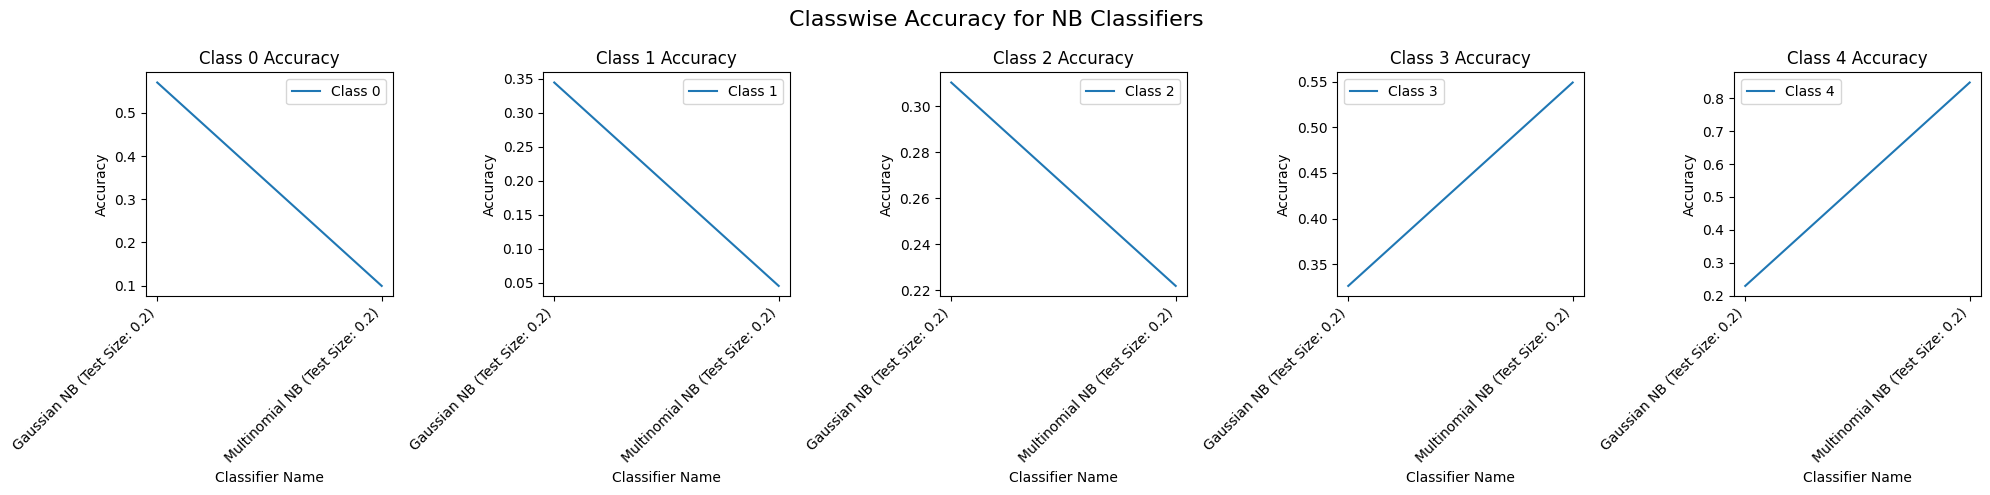

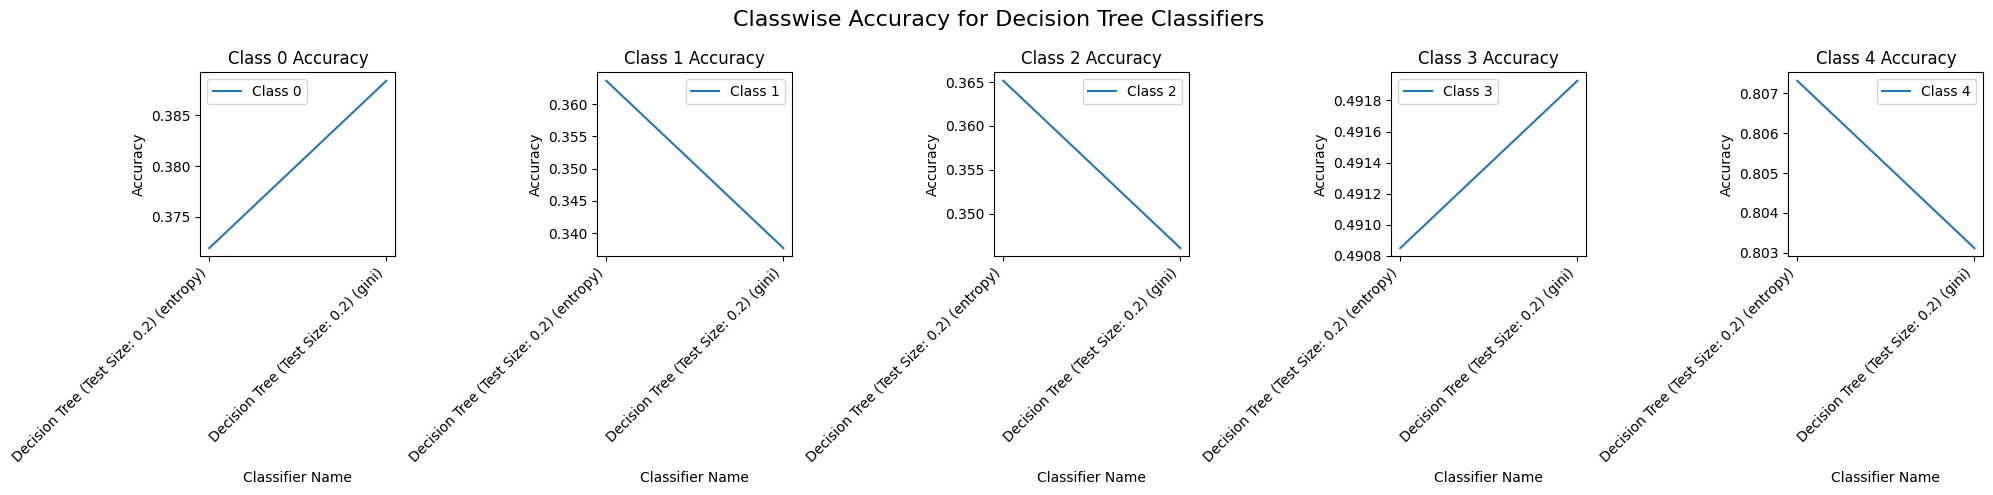

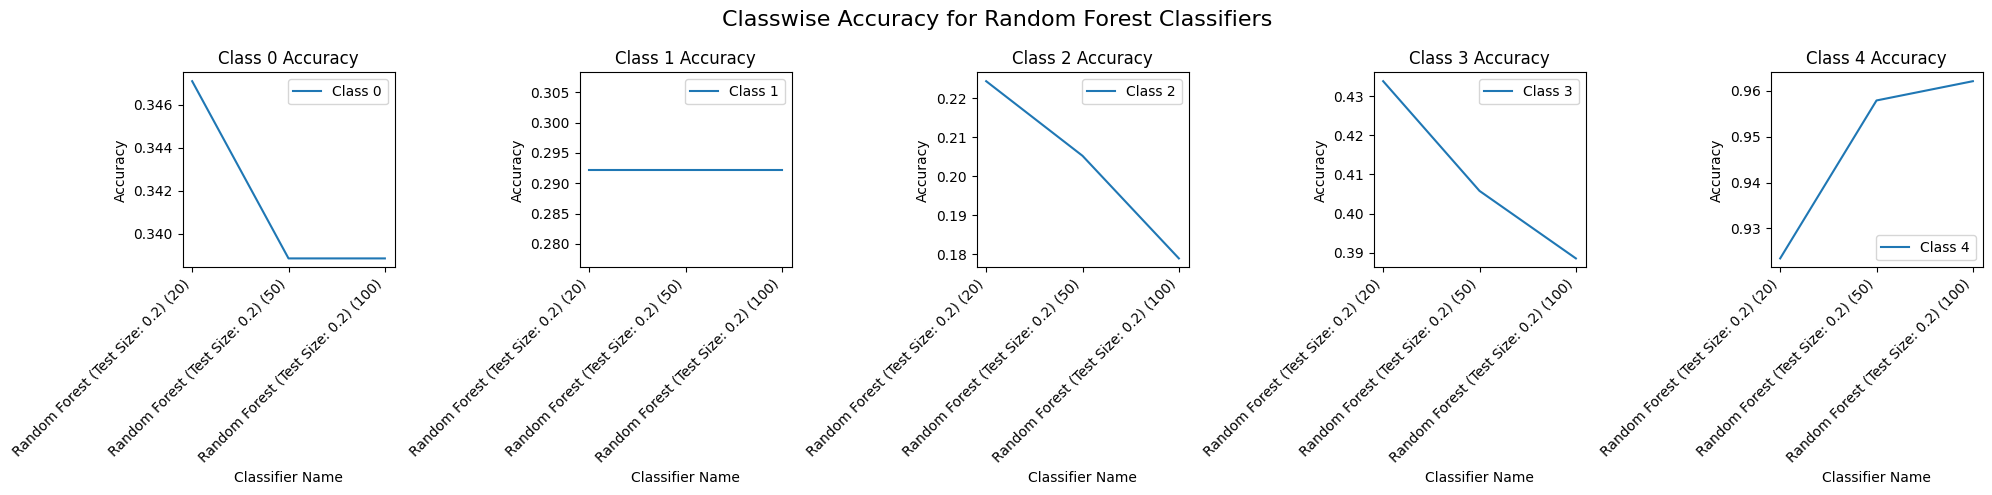

In [ ]:
# Call the function with the classifier_results_5_classes object and the desired classifier name
plot_classwise_accuracy(classifier_results_5_classes_CountVectorizer, "NB")
plot_classwise_accuracy(classifier_results_5_classes_CountVectorizer, "Decision Tree")
plot_classwise_accuracy(classifier_results_5_classes_CountVectorizer, "Random Forest")


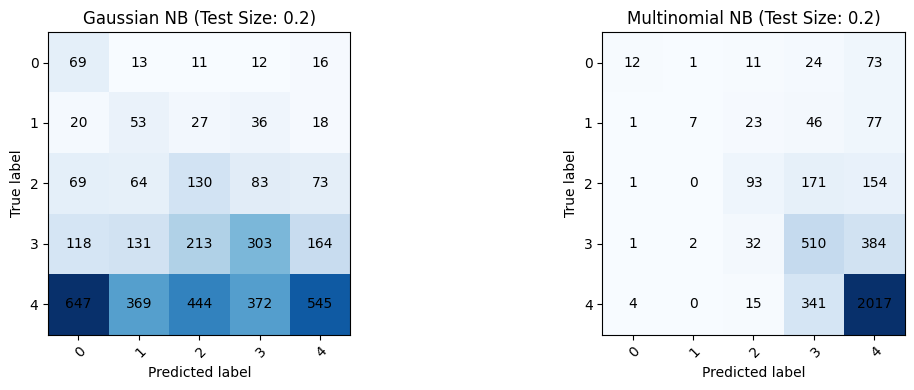

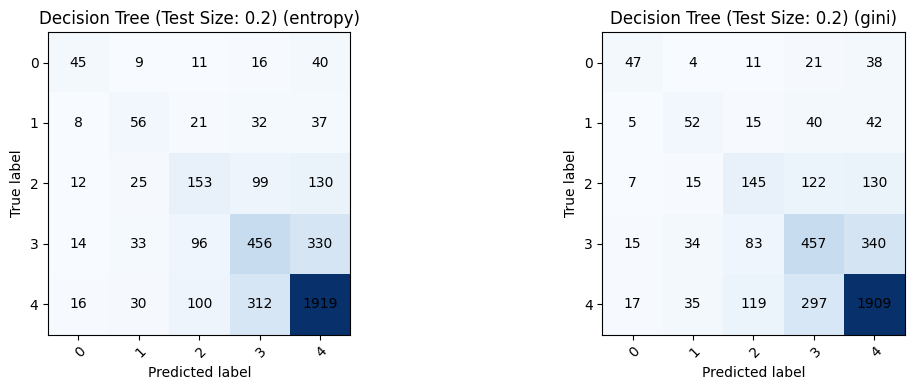

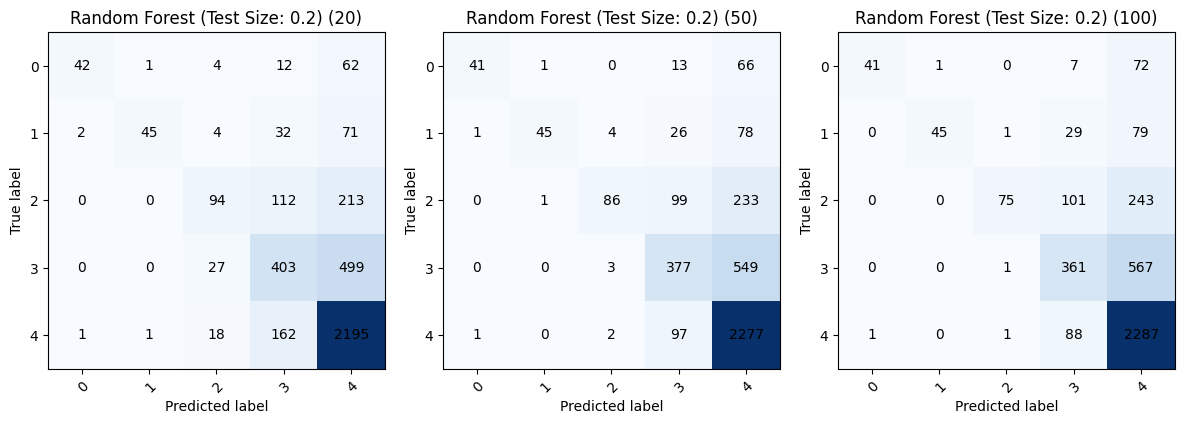

In [ ]:
# Call the function with the classifier_results_5_classes object and the desired classifier name
plot_confusion_matrices(classifier_results_5_classes_CountVectorizer, "NB")
plot_confusion_matrices(classifier_results_5_classes_CountVectorizer, "Decision Tree")
plot_confusion_matrices(classifier_results_5_classes_CountVectorizer, "Random Forest")
# plot_confusion_matrices(classifier_results_5_classes_CountVectorizer, "Random Forest (Test Size: 0.1)")
# plot_confusion_matrices(classifier_results_5_classes_CountVectorizer, "Random Forest (Test Size: 0.2)")
# plot_confusion_matrices(classifier_results_5_classes_CountVectorizer, "Random Forest (Test Size: 0.3)")

In [ ]:


# Call the function with your ClassifierResults object
analyze_errors(classifier_results_5_classes_CountVectorizer)


Analyzing errors for Gaussian NB (Test Size: 0.2):
Errors for predicted label 1:
Total Errors: 854
Misclassified as 5: 647 times
Misclassified as 4: 118 times
Misclassified as 3: 69 times
Misclassified as 2: 20 times
Errors for predicted label 3:
Total Errors: 695
Misclassified as 4: 213 times
Misclassified as 5: 444 times
Misclassified as 1: 11 times
Misclassified as 2: 27 times
Errors for predicted label 2:
Total Errors: 577
Misclassified as 4: 131 times
Misclassified as 5: 369 times
Misclassified as 3: 64 times
Misclassified as 1: 13 times
Errors for predicted label 4:
Total Errors: 503
Misclassified as 5: 372 times
Misclassified as 3: 83 times
Misclassified as 2: 36 times
Misclassified as 1: 12 times
Errors for predicted label 5:
Total Errors: 271
Misclassified as 4: 164 times
Misclassified as 1: 16 times
Misclassified as 3: 73 times
Misclassified as 2: 18 times


Analyzing errors for Multinomial NB (Test Size: 0.2):
Errors for predicted label 5:
Total Errors: 688
Misclassified as 

# Multi-class Classification | Weight Calculation : Binary Weighting

In [ ]:
X = pd.DataFrame(new_df_afterlemmatization, columns = ["lemmatization"])
y = pd.DataFrame(new_df_afterlemmatization, columns = ["overall"])


# Using Bag of Words with Binary Weighting

# test_sizes = [0.3, 0.2, 0.1]

test_sizes = [0.2]

# Initialize ClassifierResults object
classifier_results_5_classes_binary_weighting = ClassifierResults()
print("Training for 5 class classification binary weighting")
for test_size in test_sizes:
    # Split the data
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=64)

    # Convert lemmatized text to string
    train_X_text = train_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    test_X_text = test_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    train_y=train_y['overall']
    test_y=test_y['overall']
    # Vectorize text
    vectorizer = CountVectorizer(binary=True)
    train_vector = vectorizer.fit_transform(train_X_text)
    test_vector = vectorizer.transform(test_X_text)

    # Example usage:
    result_nb = nb_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_binary_weighting, test_size)
    print(f"Model training done for NB Classifiers for Test Size {test_size}")
    # classifier_results_5_classes.add_result(f"Naive Bayes (Test Size: {test_size})", result_nb)

    result_dt = decision_tree_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_binary_weighting, test_size)
    # Here, decision_tree_classifier already adds results to classifier_results_5_classes
    print(f"Model training done for Decision Tree for Test Size {test_size}")
    result_rf = random_forest_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_binary_weighting, test_size)
    # classifier_results_5_classes.add_result(f"Random Forest (Test Size: {test_size})", result_rf)
    print(f"Model training done for Random Forest for Test Size {test_size}")


Training for 5 class classification binary weighting
Model training done for NB Classifiers for Test Size 0.2
Model training done for Decision Tree for Test Size 0.2
Model training done for Random Forest for Test Size 0.2


In [ ]:
display_results(classifier_results_5_classes_binary_weighting)

Classifier: Gaussian NB (Test Size: 0.2)
Overall Accuracy: 0.27
Classwise Accuracy:
  Class 0: 0.57
  Class 1: 0.34
  Class 2: 0.31
  Class 3: 0.32
  Class 4: 0.23
Confusion Matrix:
[[ 69  13  11  12  16]
 [ 20  53  27  36  18]
 [ 69  63 131  84  72]
 [118 128 219 298 166]
 [647 370 444 370 546]]


Classifier: Multinomial NB (Test Size: 0.2)
Overall Accuracy: 0.66
Classwise Accuracy:
  Class 0: 0.07
  Class 1: 0.03
  Class 2: 0.14
  Class 3: 0.50
  Class 4: 0.88
Confusion Matrix:
[[   9    1    6   21   84]
 [   1    5   15   45   88]
 [   0    0   60  171  188]
 [   0    1   16  466  446]
 [   4    0   12  259 2102]]


Classifier: Decision Tree (Test Size: 0.2) (entropy)
Overall Accuracy: 0.64
Classwise Accuracy:
  Class 0: 0.40
  Class 1: 0.38
  Class 2: 0.33
  Class 3: 0.47
  Class 4: 0.79
Confusion Matrix:
[[  48    8   12   21   32]
 [   7   59   24   26   38]
 [   8   23  137  112  139]
 [  16   33  113  439  328]
 [  21   46  122  305 1883]]


Classifier: Decision Tree (Test Siz

In [ ]:
display_results_table(classifier_results_5_classes_binary_weighting, 5)

+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Classifier                               |   Overall Accuracy |   Class 0 Accuracy |   Class 1 Accuracy |   Class 2 Accuracy |   Class 3 Accuracy |   Class 4 Accuracy |
+==========================================+====================+====================+====================+====================+====================+====================+
| Gaussian NB (Test Size: 0.2)             |               0.27 |               0.57 |               0.34 |               0.31 |               0.32 |               0.23 |
+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Multinomial NB (Test Size: 0.2)          |               0.66 |               0.07 |               0.03 |               0.14 |               0.

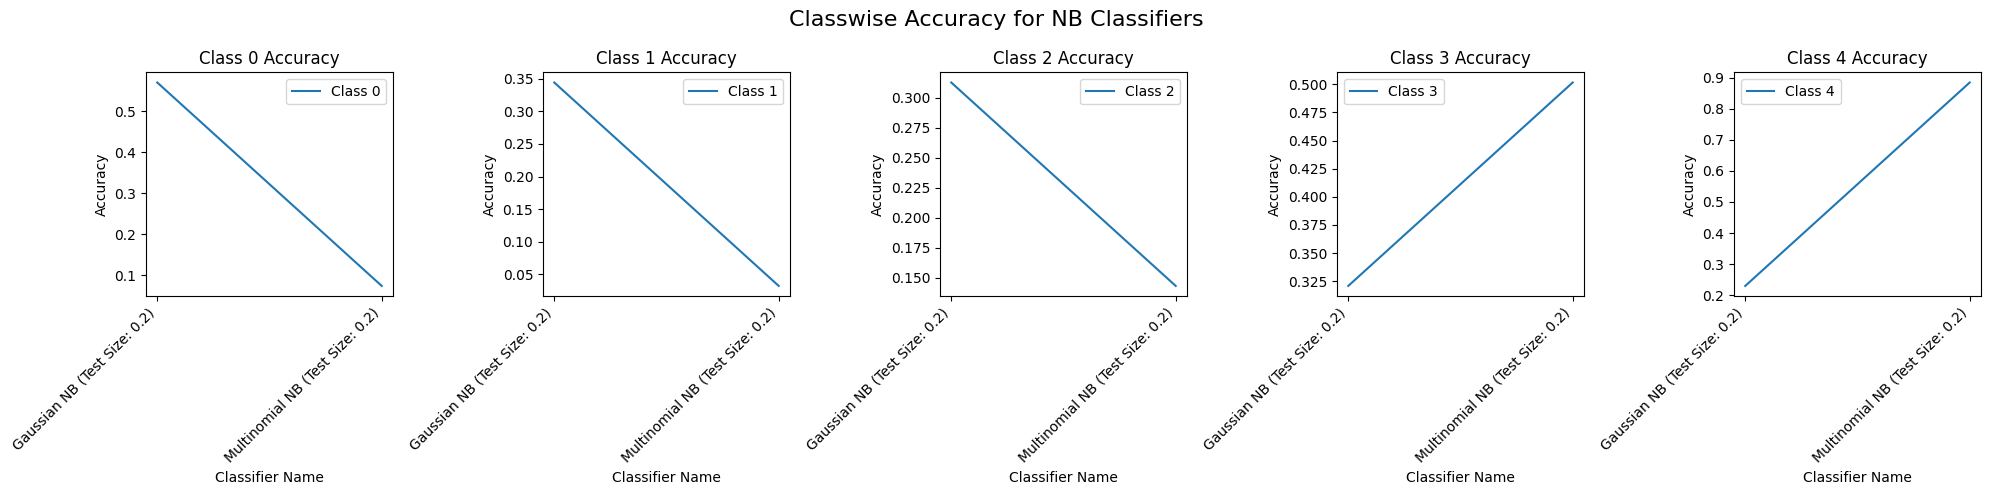

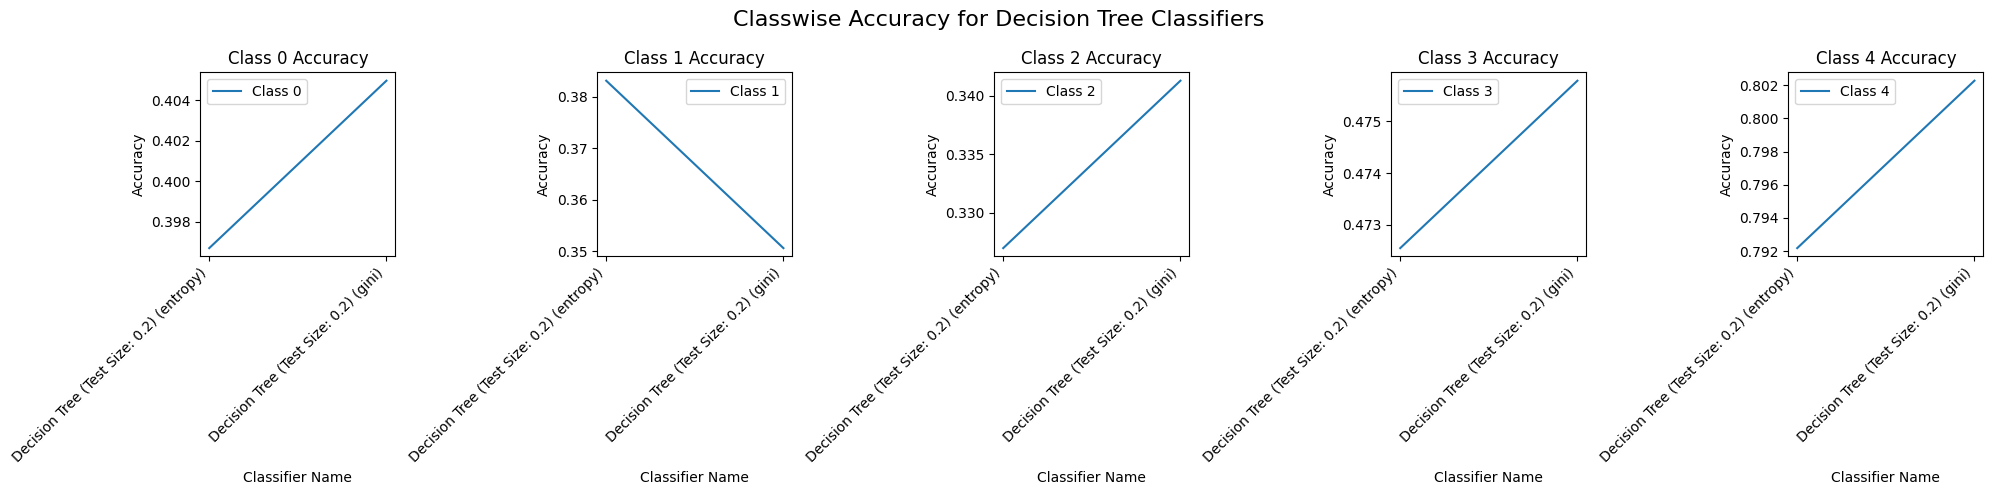

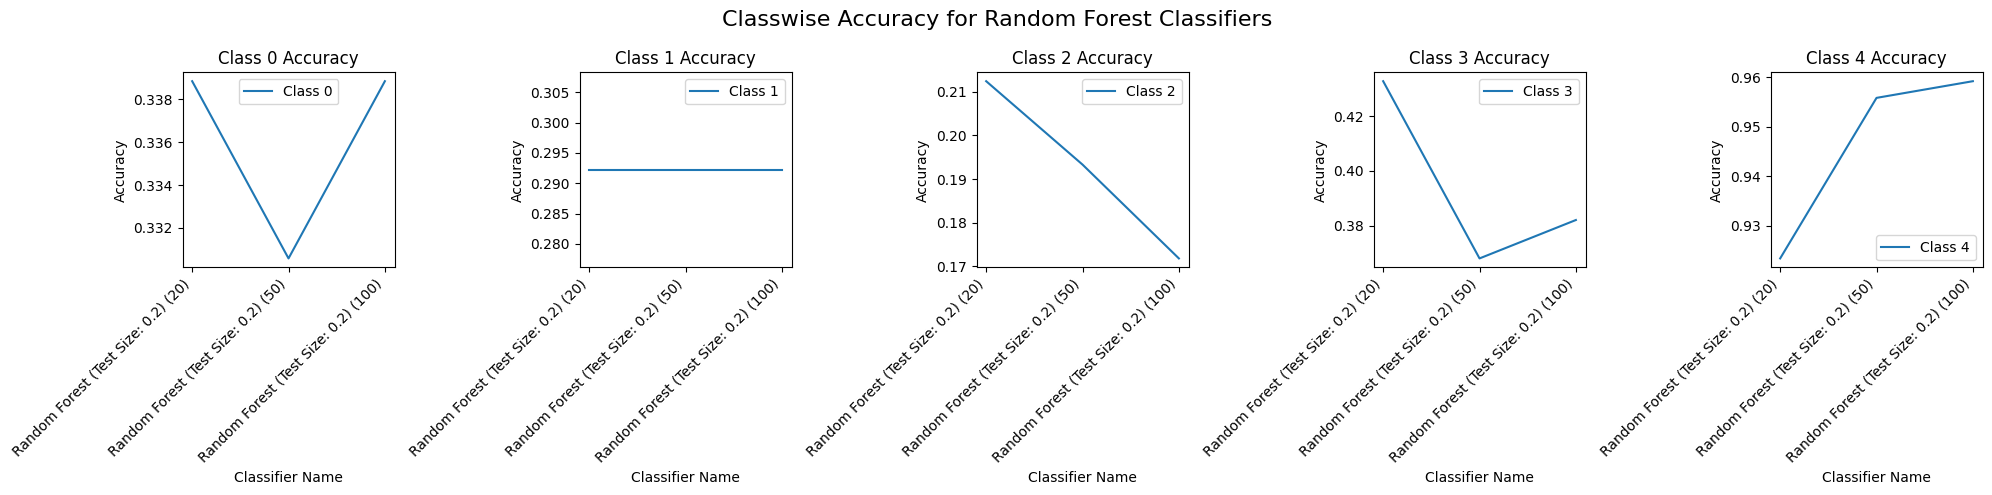

In [ ]:
plot_classwise_accuracy(classifier_results_5_classes_binary_weighting, "NB")
plot_classwise_accuracy(classifier_results_5_classes_binary_weighting, "Decision Tree")
plot_classwise_accuracy(classifier_results_5_classes_binary_weighting, "Random Forest")

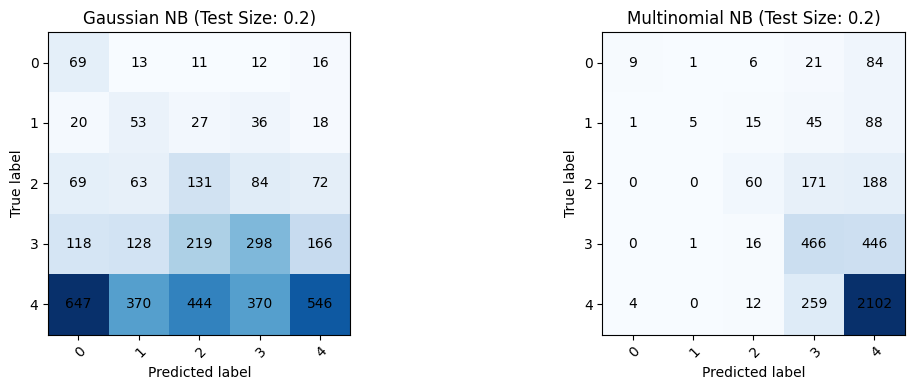

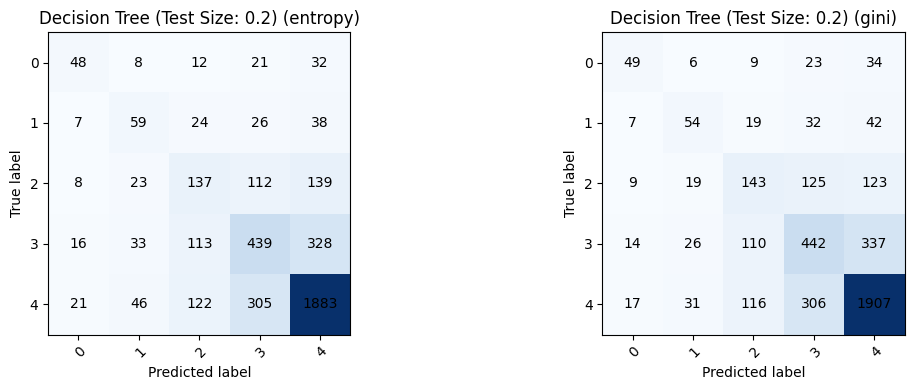

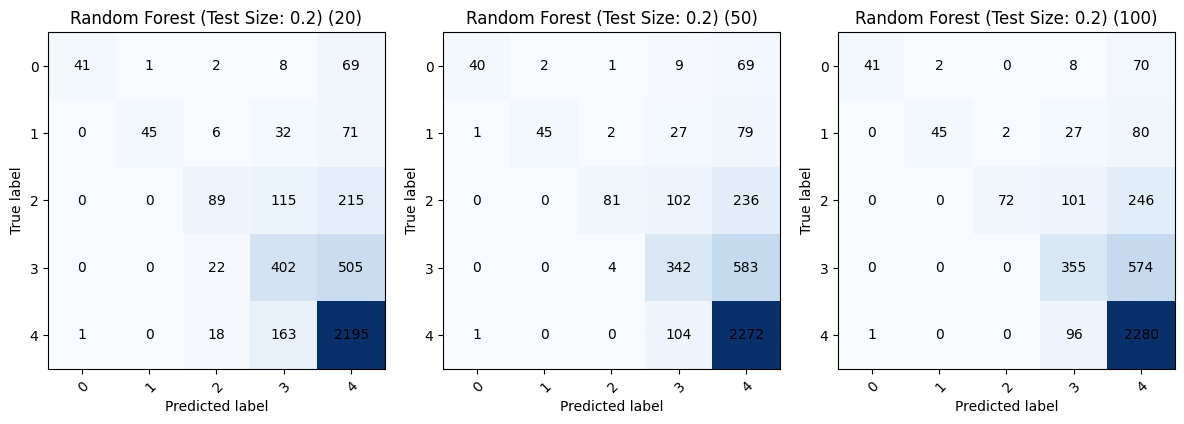

In [ ]:
plot_confusion_matrices(classifier_results_5_classes_binary_weighting, "NB")
plot_confusion_matrices(classifier_results_5_classes_binary_weighting, "Decision Tree")
plot_confusion_matrices(classifier_results_5_classes_binary_weighting, "Random Forest")
# plot_confusion_matrices(classifier_results_5_classes_binary_weighting, "Random Forest (Test Size: 0.1)")
# plot_confusion_matrices(classifier_results_5_classes_binary_weighting, "Random Forest (Test Size: 0.2)")
# plot_confusion_matrices(classifier_results_5_classes_binary_weighting, "Random Forest (Test Size: 0.3)")

In [ ]:
analyze_errors(classifier_results_5_classes_binary_weighting)

Analyzing errors for Gaussian NB (Test Size: 0.2):
Errors for predicted label 1:
Total Errors: 854
Misclassified as 5: 647 times
Misclassified as 4: 118 times
Misclassified as 3: 69 times
Misclassified as 2: 20 times
Errors for predicted label 3:
Total Errors: 701
Misclassified as 4: 219 times
Misclassified as 5: 444 times
Misclassified as 1: 11 times
Misclassified as 2: 27 times
Errors for predicted label 2:
Total Errors: 574
Misclassified as 4: 128 times
Misclassified as 5: 370 times
Misclassified as 3: 63 times
Misclassified as 1: 13 times
Errors for predicted label 4:
Total Errors: 502
Misclassified as 5: 370 times
Misclassified as 3: 84 times
Misclassified as 2: 36 times
Misclassified as 1: 12 times
Errors for predicted label 5:
Total Errors: 272
Misclassified as 4: 166 times
Misclassified as 1: 16 times
Misclassified as 3: 72 times
Misclassified as 2: 18 times


Analyzing errors for Multinomial NB (Test Size: 0.2):
Errors for predicted label 5:
Total Errors: 806
Misclassified as 

# Multi-class Classification | Weight Calculation : TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# test_sizes = [0.3, 0.2, 0.1]
test_sizes = [0.2]

# Initialize ClassifierResults object
classifier_results_5_classes_TFIDF_Vectorization = ClassifierResults()
print("Training for 5 class classification TF-IDF Vectorization")
for test_size in test_sizes:
    # Split the data
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=64)

    # Convert lemmatized text to string
    train_X_text = train_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    test_X_text = test_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    train_y=train_y['overall']
    test_y=test_y['overall']
    # Vectorize text
    vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
    train_vector = vectorizer.fit_transform(train_X_text)
    test_vector = vectorizer.transform(test_X_text)

    # Example usage:
    result_nb = nb_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_TFIDF_Vectorization, test_size)
    print(f"Model training done for NB Classifiers for Test Size {test_size}")
    # classifier_results_5_classes.add_result(f"Naive Bayes (Test Size: {test_size})", result_nb)

    result_dt = decision_tree_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_TFIDF_Vectorization, test_size)
    # Here, decision_tree_classifier already adds results to classifier_results_5_classes
    print(f"Model training done for Decision Tree for Test Size {test_size}")
    result_rf = random_forest_classifier(train_vector, train_y, test_vector, test_y,5, classifier_results_5_classes_TFIDF_Vectorization, test_size)
    # classifier_results_5_classes.add_result(f"Random Forest (Test Size: {test_size})", result_rf)
    print(f"Model training done for Random Forest for Test Size {test_size}")
# print(classifier_results_5_classes.get_results())


Training for 5 class classification TF-IDF Vectorization
Model training done for NB Classifiers for Test Size 0.2
Model training done for Decision Tree for Test Size 0.2
Model training done for Random Forest for Test Size 0.2


In [ ]:
display_results(classifier_results_5_classes_TFIDF_Vectorization)

Classifier: Gaussian NB (Test Size: 0.2)
Overall Accuracy: 0.28
Classwise Accuracy:
  Class 0: 0.55
  Class 1: 0.36
  Class 2: 0.30
  Class 3: 0.32
  Class 4: 0.25
Confusion Matrix:
[[ 66  16  11  10  18]
 [ 17  56  25  36  20]
 [ 64  69 124  81  81]
 [109 139 201 300 180]
 [600 408 422 358 589]]


Classifier: Multinomial NB (Test Size: 0.2)
Overall Accuracy: 0.60
Classwise Accuracy:
  Class 0: 0.00
  Class 1: 0.00
  Class 2: 0.00
  Class 3: 0.05
  Class 4: 1.00
Confusion Matrix:
[[   0    0    0    3  118]
 [   0    0    1    1  152]
 [   0    0    0    4  415]
 [   0    0    0   47  882]
 [   0    0    0    6 2371]]


Classifier: Decision Tree (Test Size: 0.2) (entropy)
Overall Accuracy: 0.65
Classwise Accuracy:
  Class 0: 0.36
  Class 1: 0.35
  Class 2: 0.34
  Class 3: 0.46
  Class 4: 0.82
Confusion Matrix:
[[  43    7   17   17   37]
 [   8   54   25   28   39]
 [  14   25  143  102  135]
 [  19   32  117  429  332]
 [  20   42   92  283 1940]]


Classifier: Decision Tree (Test Siz

In [ ]:
display_results_table(classifier_results_5_classes_TFIDF_Vectorization, 5)

+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Classifier                               |   Overall Accuracy |   Class 0 Accuracy |   Class 1 Accuracy |   Class 2 Accuracy |   Class 3 Accuracy |   Class 4 Accuracy |
+==========================================+====================+====================+====================+====================+====================+====================+
| Gaussian NB (Test Size: 0.2)             |               0.28 |               0.55 |               0.36 |               0.3  |               0.32 |               0.25 |
+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Multinomial NB (Test Size: 0.2)          |               0.6  |               0    |               0    |               0    |               0.

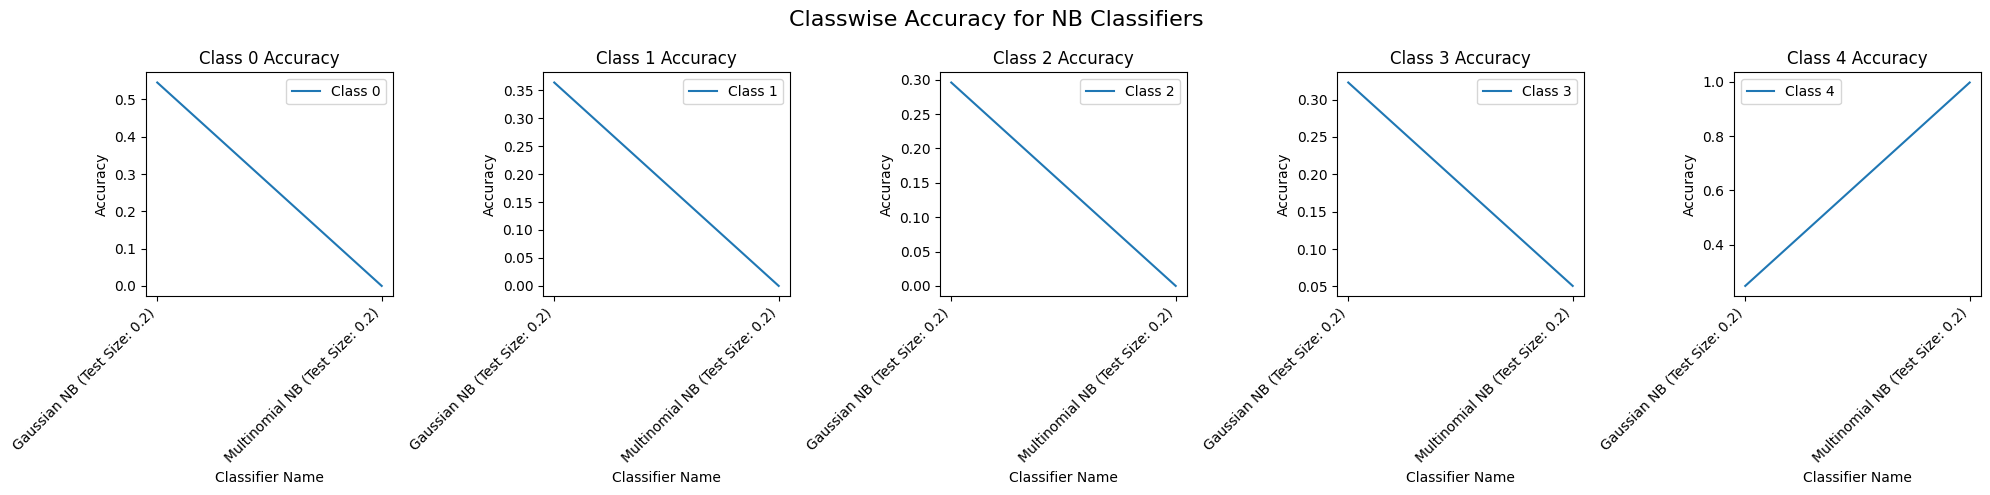

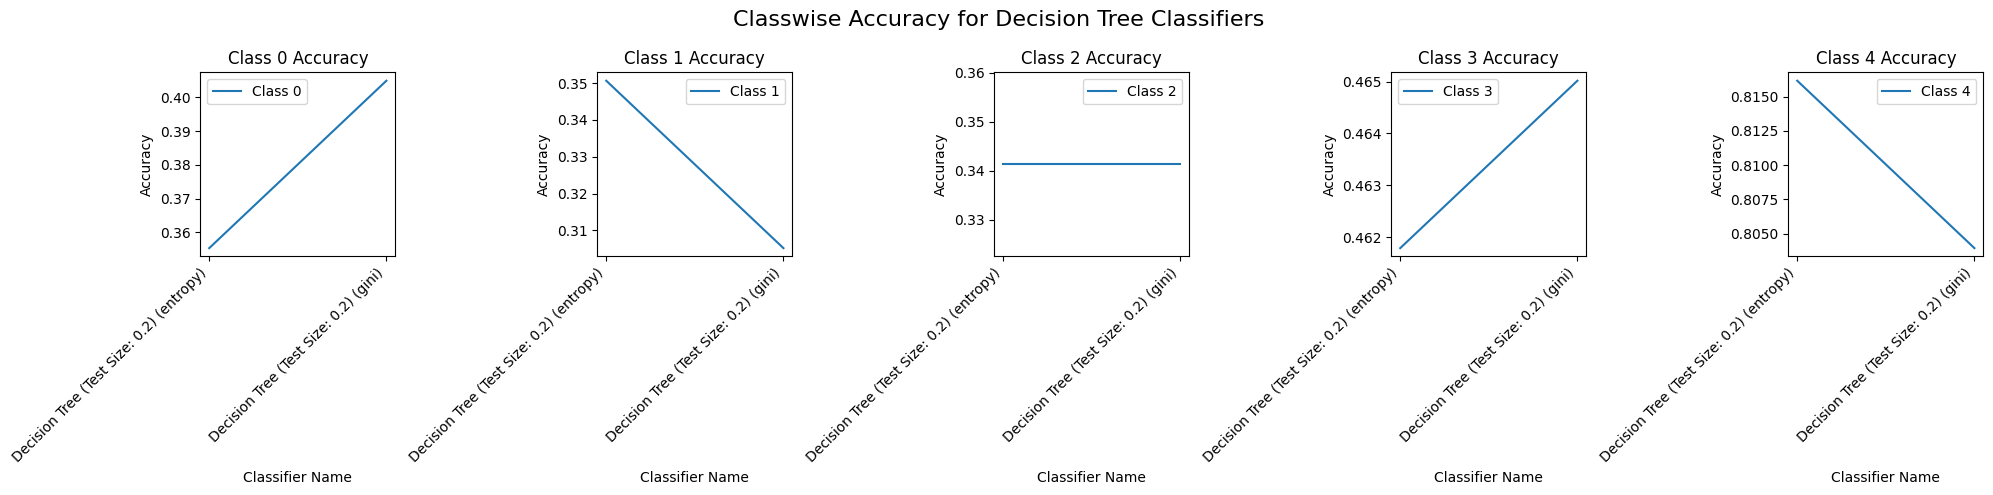

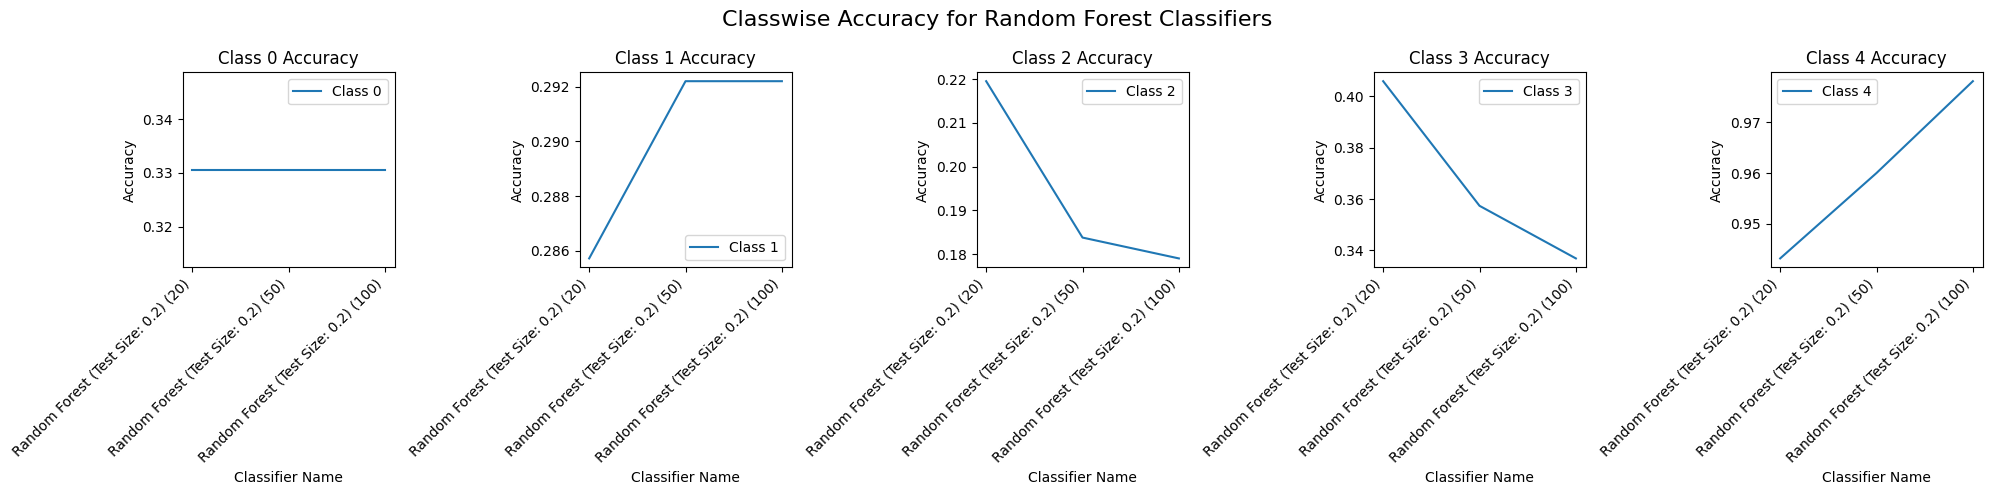

In [ ]:
plot_classwise_accuracy(classifier_results_5_classes_TFIDF_Vectorization, "NB")
plot_classwise_accuracy(classifier_results_5_classes_TFIDF_Vectorization, "Decision Tree")
plot_classwise_accuracy(classifier_results_5_classes_TFIDF_Vectorization, "Random Forest")

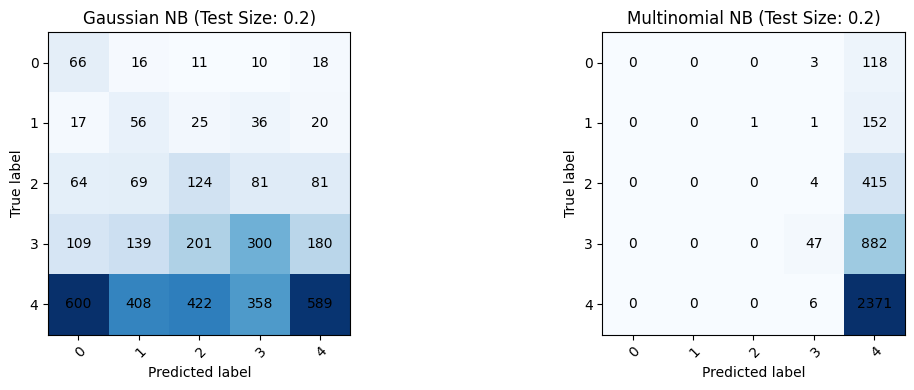

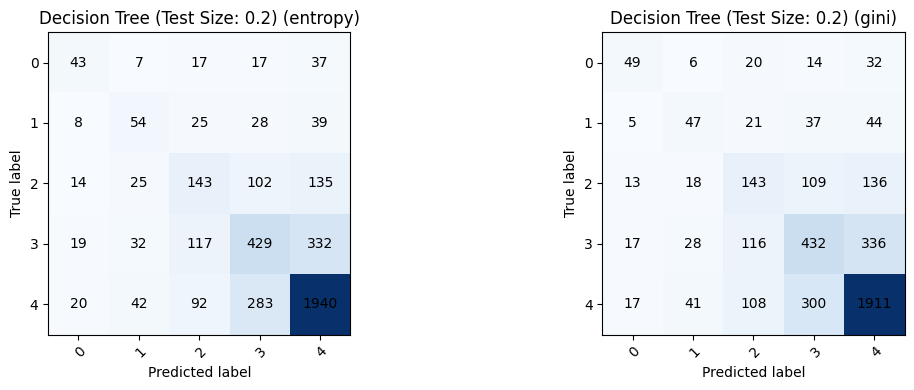

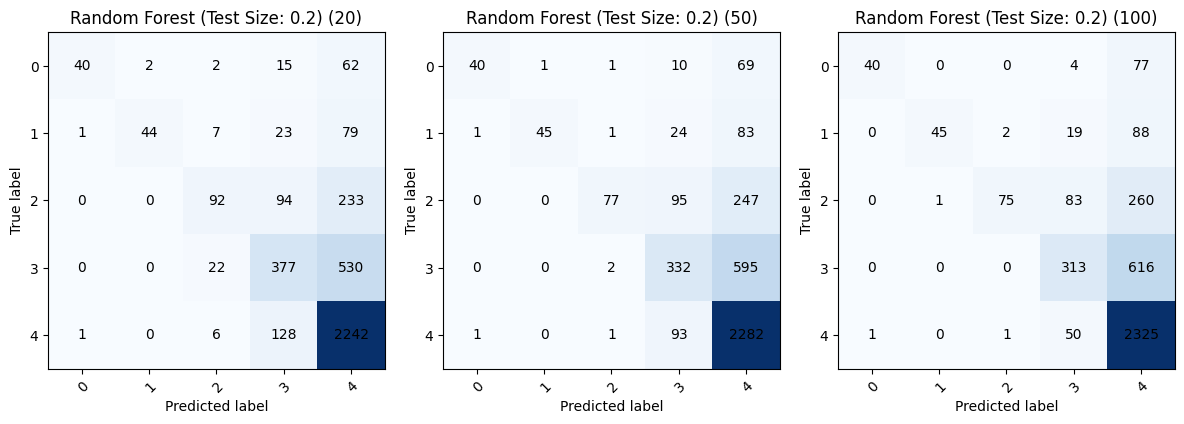

In [ ]:
plot_confusion_matrices(classifier_results_5_classes_TFIDF_Vectorization, "NB")
plot_confusion_matrices(classifier_results_5_classes_TFIDF_Vectorization, "Decision Tree")
plot_confusion_matrices(classifier_results_5_classes_TFIDF_Vectorization, "Random Forest")

In [ ]:
analyze_errors(classifier_results_5_classes_TFIDF_Vectorization)

Analyzing errors for Gaussian NB (Test Size: 0.2):
Errors for predicted label 1:
Total Errors: 790
Misclassified as 5: 600 times
Misclassified as 4: 109 times
Misclassified as 3: 64 times
Misclassified as 2: 17 times
Errors for predicted label 3:
Total Errors: 659
Misclassified as 4: 201 times
Misclassified as 5: 422 times
Misclassified as 1: 11 times
Misclassified as 2: 25 times
Errors for predicted label 2:
Total Errors: 632
Misclassified as 4: 139 times
Misclassified as 5: 408 times
Misclassified as 3: 69 times
Misclassified as 1: 16 times
Errors for predicted label 4:
Total Errors: 485
Misclassified as 5: 358 times
Misclassified as 3: 81 times
Misclassified as 2: 36 times
Misclassified as 1: 10 times
Errors for predicted label 5:
Total Errors: 299
Misclassified as 4: 180 times
Misclassified as 1: 18 times
Misclassified as 3: 81 times
Misclassified as 2: 20 times


Analyzing errors for Multinomial NB (Test Size: 0.2):
Errors for predicted label 5:
Total Errors: 1567
Misclassified as

# Binary Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate


def nb_classifier_binary(train_vector, train_y, test_vector, test_y,num_classes, classifier_results, test_size):
    """
    Train both Multinomial and Gaussian Naive Bayes classifiers and evaluate their performance.

    Parameters:
    train_vector (array-like): Training data features.
    train_y (array-like): Training data labels.
    test_vector (array-like): Test data features.
    test_y (array-like): Test data labels.
    classifier_results (ClassifierResults): Object to store classifier results.
    test_size (float): Size of the test set.

    Returns:
    dict: A dictionary containing results for both Multinomial and Gaussian Naive Bayes classifiers.
    """
    results = {}

    # Gaussian Naive Bayes
    gaussian_classifier = GaussianNB()
    gaussian_classifier.fit(train_vector.toarray(), train_y.values.ravel())
    # gaussian_classifier.fit(train_vector, train_y.values.ravel())

    gaussian_y_pred = gaussian_classifier.predict(test_vector.toarray())
    gaussian_accuracy = metrics.accuracy_score(test_y, gaussian_y_pred)
    gaussian_classwise_acc = ClasswiseAccuracy(test_y.to_numpy(), gaussian_y_pred, num_classes=2).calculate_classwise_accuracy()
    gaussian_confusion_matrix = metrics.confusion_matrix(test_y, gaussian_y_pred)
    # Calculate precision and recall
    gaussian_precision = precision_score(test_y, gaussian_y_pred, average=None)
    gaussian_recall = recall_score(test_y, gaussian_y_pred, average=None)
    f1 = f1_score(test_y, gaussian_y_pred, average=None)
    results["Gaussian NB"] = {
        "overall_accuracy": gaussian_accuracy,
        "precision": gaussian_precision,
        "recall": gaussian_recall,
        "f1": f1,
        "classwise_accuracy": gaussian_classwise_acc,
        "confusion_matrix": gaussian_confusion_matrix,
        "predicted_labels": gaussian_y_pred.tolist(),
        "actual_labels": test_y.tolist()
    }

    # Multinomial Naive Bayes
    multinomial_classifier = MultinomialNB()
    multinomial_classifier.fit(train_vector, train_y.values.ravel())
    multinomial_y_pred = multinomial_classifier.predict(test_vector)
    multinomial_accuracy = metrics.accuracy_score(test_y, multinomial_y_pred)
    multinomial_confusion_matrix = metrics.confusion_matrix(test_y, multinomial_y_pred)
    # Calculate precision and recall
    multinomial_precision = precision_score(test_y, multinomial_y_pred, average=None)
    multinomial_recall = recall_score(test_y, multinomial_y_pred, average=None)
    f1 = f1_score(test_y, multinomial_y_pred, average=None)
    # Calculate classwise accuracy
    multinomial_classwise_acc = ClasswiseAccuracy(test_y.to_numpy(), multinomial_y_pred, num_classes).calculate_classwise_accuracy()

    # Calculate confusion matrix
    multinomial_confusion_matrix = metrics.confusion_matrix(test_y, multinomial_y_pred)

    results["Multinomial NB"] = {
        "overall_accuracy": multinomial_accuracy,
        "precision": multinomial_precision,
        "recall": multinomial_recall,
        "f1": f1,
        "classwise_accuracy": multinomial_classwise_acc,
        "confusion_matrix": multinomial_confusion_matrix,
        "predicted_labels": multinomial_y_pred.tolist(),
        "actual_labels": test_y.tolist()
    }

    # Add results to the classifier_results dictionary
    for classifier_name, classifier_result in results.items():
        classifier_results.add_result(f"{classifier_name} (Test Size: {test_size})", classifier_result)

    return results

def plot_classwise_accuracy_binary(classifier_results, classifier_name):
    # Get all classifiers from the ClassifierResults object
    classifiers = classifier_results.get_results()

    # Filter classifiers that contain the specified classifier name
    filtered_classifiers = {name: results['classwise_accuracy'] for name, results in classifiers.items() if classifier_name in name}

    # Extract classwise accuracies for the specified classifier
    classwise_accuracies = {}
    for name, classwise_accuracy in filtered_classifiers.items():
        for i, (class_name, acc) in enumerate(classwise_accuracy.items()):
            if i not in classwise_accuracies:
                classwise_accuracies[i] = []
            classwise_accuracies[i].append(acc)

    # Plot classwise accuracies
    plt.figure(figsize=(8, 4))
    num_classes = len(classwise_accuracies)
    for i, acc_values in classwise_accuracies.items():
        plt.subplot(1, num_classes, i+1)
        plt.plot(list(filtered_classifiers.keys()), acc_values, label=f'Class {i}')
        plt.title(f'Class {i} Accuracy')
        plt.xlabel('Classifier Name')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')
        plt.legend()

    plt.suptitle(f'Classwise Accuracy for {classifier_name} Classifiers', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrices_binary(classifier_results, classifier_name):
    # Get all classifiers from the ClassifierResults object
    classifiers = classifier_results.get_results()

    # Filter classifiers that contain the specified classifier name
    filtered_classifiers = {name: results['confusion_matrix'] for name, results in classifiers.items() if classifier_name in name}

    # Set the number of rows and columns for the subplot
    num_plots = len(filtered_classifiers)
    num_rows = 1
    num_cols = num_plots

    # Create the subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

    # Flatten axes if there's only one plot
    if num_plots == 1:
        axes = np.array([axes])

    # Plot each confusion matrix
    for i, (name, confusion_matrix) in enumerate(filtered_classifiers.items()):
        ax = axes[i]
        im = ax.imshow(confusion_matrix, cmap='Blues')

        # Set title and labels
        ax.set_title(name)
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')

        # Show ticks
        ax.set_xticks(np.arange(len(confusion_matrix)))
        ax.set_yticks(np.arange(len(confusion_matrix)))
        ax.set_xticklabels(np.arange(len(confusion_matrix)))
        ax.set_yticklabels(np.arange(len(confusion_matrix)))

        # Rotate the tick labels and set their alignment
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

        # Loop over data dimensions and create text annotations
        for x in range(len(confusion_matrix)):
            for y in range(len(confusion_matrix)):
                ax.text(y, x, f'{confusion_matrix[x, y]}', ha='center', va='center', color='black')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


In [ ]:
X = pd.DataFrame(new_df_afterlemmatization, columns = ["lemmatization"])
y = pd.DataFrame(new_df_afterlemmatization, columns = ["label"])

In [ ]:

# test_sizes = [0.3, 0.2, 0.1]
test_sizes = [0.2]
# Initialize ClassifierResults object
classifier_results_binary = ClassifierResults()
print("Training for Binary classification")
for test_size in test_sizes:
    # Split the data
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=64)

    # Convert lemmatized text to string
    train_X_text = train_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')
    test_X_text = test_X["lemmatization"].apply(lambda x: ' '.join(x)).values.astype('U')

    # Vectorize text
    vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
    train_vector = vectorizer.fit_transform(train_X_text)
    test_vector = vectorizer.transform(test_X_text)
    train_y=train_y['label']
    test_y=test_y['label']
    result_nb = nb_classifier_binary(train_vector, train_y, test_vector, test_y,2, classifier_results_binary, test_size)
    print(f"Model training done for NB Classifiers for Test Size {test_size}")
    # classifier_results_5_classes.add_result(f"Naive Bayes (Test Size: {test_size})", result_nb)

    result_dt = decision_tree_classifier(train_vector, train_y, test_vector, test_y,2, classifier_results_binary, test_size)
    # Here, decision_tree_classifier already adds results to classifier_results_5_classes
    print(f"Model training done for Decision Tree for Test Size {test_size}")
    result_rf = random_forest_classifier(train_vector, train_y, test_vector, test_y,2, classifier_results_binary, test_size)
    # classifier_results_5_classes.add_result(f"Random Forest (Test Size: {test_size})", result_rf)
    print(f"Model training done for Random Forest for Test Size {test_size}")

print(classifier_results_binary.get_results())


Training for Binary classification
Model training done for NB Classifiers for Test Size 0.2
Model training done for Decision Tree for Test Size 0.2
Model training done for Random Forest for Test Size 0.2
{'Gaussian NB (Test Size: 0.2)': {'overall_accuracy': 0.5915, 'precision': array([0.09769094, 0.95240156]), 'recall': array([0.6       , 0.59087248]), 'f1': array([0.16802444, 0.72929092]), 'classwise_accuracy': {'Class 0': 0.6, 'Class 1': 0.5908724832214766}, 'confusion_matrix': array([[ 165,  110],
       [1524, 2201]]), 'predicted_labels': [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 

In [ ]:
from tabulate import tabulate

def display_results_table_binary(classifier_results):
    """
    Display results stored in a ClassifierResults object in tabular format.

    Parameters:
    classifier_results (ClassifierResults): Object containing classifier results.

    Returns:
    None
    """
    results = classifier_results.get_results()
    table_data = []
    for result_key, result_value in results.items():
        # Extract metrics
        overall_accuracy = result_value['overall_accuracy']
        classwise_accuracy = result_value['classwise_accuracy']
        precision = result_value['precision']
        recall = result_value['recall']
        f1 = result_value['f1']  # Assuming 'f1' is present in the dictionary

        row = [result_key, f"{overall_accuracy:.2f}"] + [f"{acc:.2f}" for acc in classwise_accuracy.values()] + [f"{p:.2f}" for p in precision] + [f"{r:.2f}" for r in recall] + [f"{f:.2f}" for f in f1]
        table_data.append(row)

    headers = ["Classifier", "Overall Accuracy"] + [f"Class {i} Accuracy" for i in range(2)] + [f"Class {i} Precision" for i in range(2)] + [f"Class {i} Recall" for i in range(2)] + [f"Class {i} F1-score" for i in range(2)]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

display_results_table_binary(classifier_results_binary)



+------------------------------------------+--------------------+--------------------+--------------------+---------------------+---------------------+------------------+------------------+--------------------+--------------------+
| Classifier                               |   Overall Accuracy |   Class 0 Accuracy |   Class 1 Accuracy |   Class 0 Precision |   Class 1 Precision |   Class 0 Recall |   Class 1 Recall |   Class 0 F1-score |   Class 1 F1-score |
+==========================================+====================+====================+====================+=====================+=====================+==================+==================+====================+====================+
| Gaussian NB (Test Size: 0.2)             |               0.59 |               0.6  |               0.59 |                0.1  |                0.95 |             0.6  |             0.59 |               0.17 |               0.73 |
+------------------------------------------+--------------------+-------

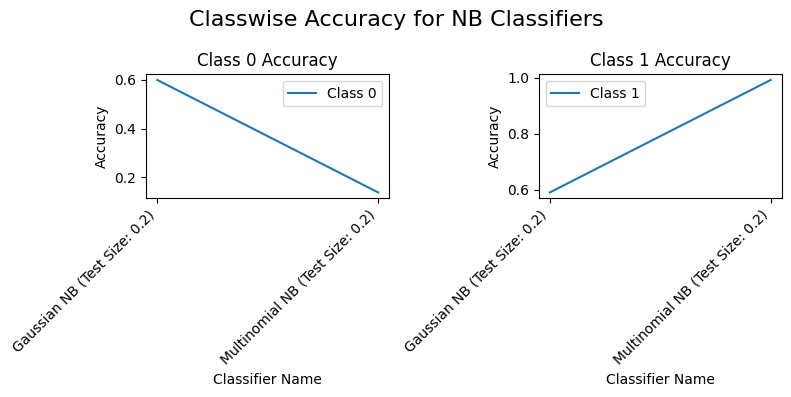

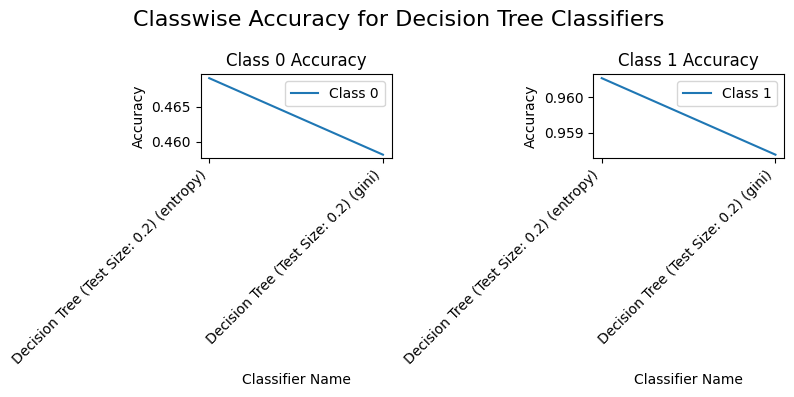

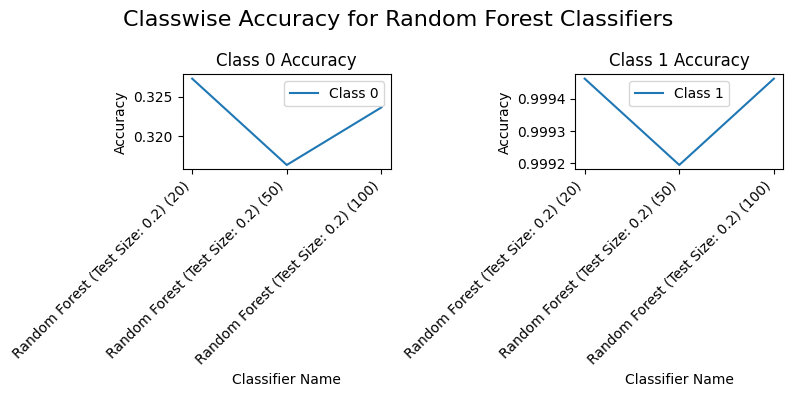

In [ ]:
# Call the function with the classifier_results_5_classes object and the desired classifier name
plot_classwise_accuracy_binary(classifier_results_binary, "NB")
plot_classwise_accuracy_binary(classifier_results_binary, "Decision Tree")
plot_classwise_accuracy_binary(classifier_results_binary, "Random Forest")

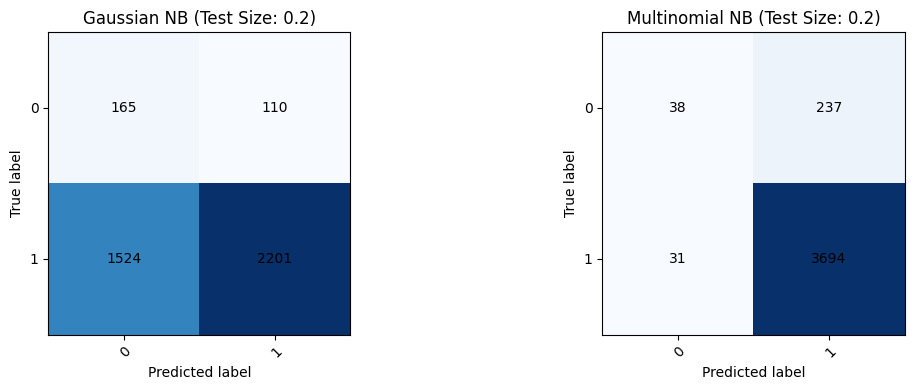

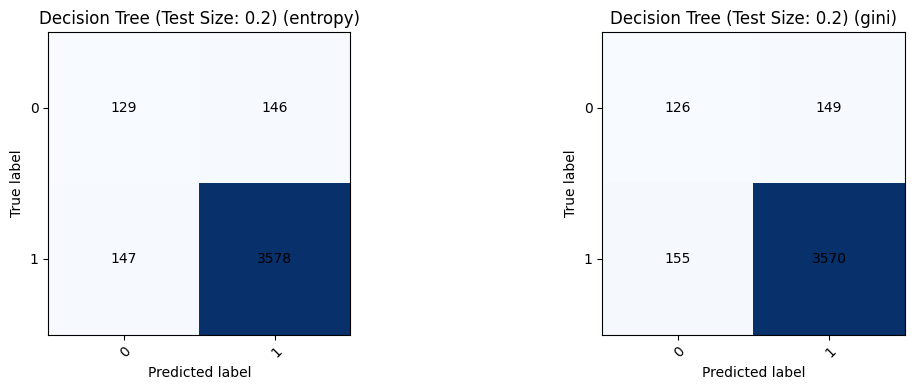

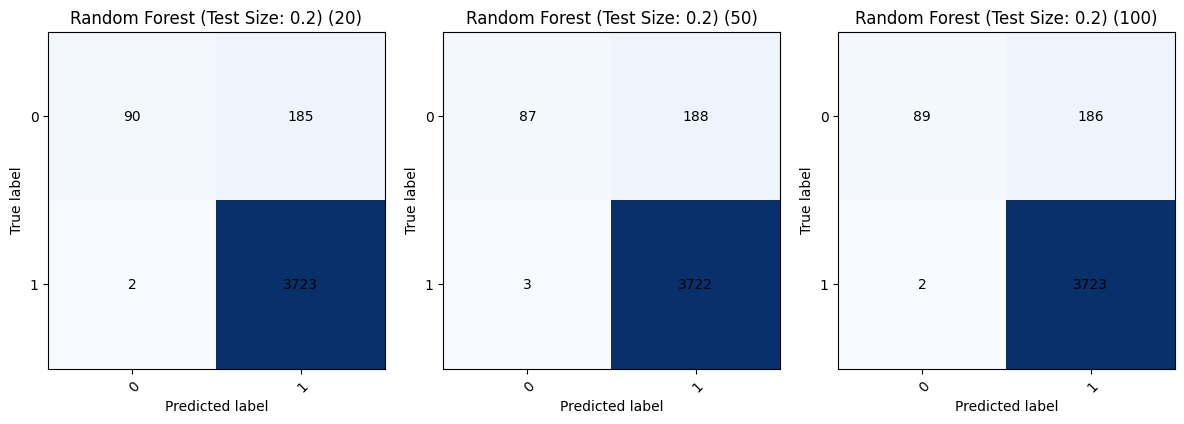

In [ ]:
plot_confusion_matrices_binary(classifier_results_binary, "NB")
plot_confusion_matrices_binary(classifier_results_binary, "Decision Tree")
plot_confusion_matrices_binary(classifier_results_binary, "Random Forest (Test Size: 0.2)")
# plot_confusion_matrices_binary(classifier_results_binary, "Random Forest (Test Size: 0.1)")
# plot_confusion_matrices_binary(classifier_results_binary, "Random Forest (Test Size: 0.2)")
# plot_confusion_matrices_binary(classifier_results_binary, "Random Forest (Test Size: 0.3)")

In [ ]:
analyze_errors(classifier_results_binary)

Analyzing errors for Gaussian NB (Test Size: 0.2):
Errors for predicted label 0:
Total Errors: 1524
Misclassified as 1: 1524 times
Errors for predicted label 1:
Total Errors: 110
Misclassified as 0: 110 times


Analyzing errors for Multinomial NB (Test Size: 0.2):
Errors for predicted label 1:
Total Errors: 237
Misclassified as 0: 237 times
Errors for predicted label 0:
Total Errors: 31
Misclassified as 1: 31 times


Analyzing errors for Decision Tree (Test Size: 0.2) (entropy):
Errors for predicted label 0:
Total Errors: 147
Misclassified as 1: 147 times
Errors for predicted label 1:
Total Errors: 146
Misclassified as 0: 146 times


Analyzing errors for Decision Tree (Test Size: 0.2) (gini):
Errors for predicted label 0:
Total Errors: 155
Misclassified as 1: 155 times
Errors for predicted label 1:
Total Errors: 149
Misclassified as 0: 149 times


Analyzing errors for Random Forest (Test Size: 0.2) (20):
Errors for predicted label 1:
Total Errors: 185
Misclassified as 0: 185 times
Erro